📡 Σύνολο Δεδομένων για Ευφυή Διαχείριση IoT στο 6G
Διαχείριση κατευθυντικής δέσμης με υποβοήθηση υπολογιστικής όρασης σε δίκτυα 6G

🔍 Περιγραφή
Αυτό το σύνολο δεδομένων έχει σχεδιαστεί για την ανάλυση και βελτιστοποίηση της κατευθυντικής δέσμης (beamforming) σε δίκτυα 6G-IoT, με τη χρήση τεχνικών υπολογιστικής όρασης (computer vision).

Περιέχει περιβαλλοντικές και τεχνικές παραμέτρους που επηρεάζουν την απόδοση του beamforming, όπως:

Πυκνότητα εμποδίων

Κινητικότητα

Συχνότητα

Ισχύς εκπομπής

Επίπεδα παρεμβολών

📊 Μετρικές Απόδοσης που Περιλαμβάνονται
Κέρδος Κατευθυντικής Δέσμης (Beamforming Gain - dB)

Καθυστέρηση (Latency - ms)

Κατανάλωση Ενέργειας (kWh/Gb)

Ρυθμός Μετάδοσης (Throughput - Mbps)

Χρόνος Εκπαίδευσης Δέσμης (Beam Training Time - s)

Βελτίωση SNR (dB)

Χρόνος Επεξεργασίας (ms)

Χρήση Μνήμης (MB)

🎯 Μεταβλητή-Στόχος (Target)
Optimized = 1 → Επιτυχής βελτιστοποίηση beamforming

Optimized = 0 → Αποτυχία βελτιστοποίησης

📌 Κύρια Χαρακτηριστικά
✅ Δικτυακές Παράμετροι: Συχνότητα (GHz), Ισχύς Εκπομπής (dBm), Εύρος Ζώνης (MHz), Μέγεθος Κωδικοβιβλίου
✅ Περιβαλλοντικοί Παράγοντες: Πυκνότητα εμποδίων, Κινητικότητα (m/s), Εσωτερικός / Εξωτερικός Χώρος
✅ Χαρακτηριστικά Συσκευών: Αριθμός κεραιών, Τύπος συσκευής (Smartphone, IoT Sensor, Drone)
✅ Χαρακτηριστικά Υπολογιστικής Όρασης: Εξαγόμενα SIFT keypoints για ευφυείς αποφάσεις δέσμης



In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/6g-iot-intelligent-management-dataset/6G_IoT_Beamforming_Dataset.csv


In [4]:
# Βιβλιοθήκες για ανάλυση δεδομένων και ML
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ML βιβλιοθήκες
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix



In [6]:

df = pd.read_csv('/kaggle/input/6g-iot-intelligent-management-dataset/6G_IoT_Beamforming_Dataset.csv')  # Αντικατάστησε με το σωστό όνομα αρχείου


print(df.head())       # Πρώτες γραμμές



   Obstacle Density  Mobility (m/s)  Frequency (GHz)  Transmit Power (dBm)  \
0                 6        2.612250               60             34.668228   
1                 1        1.335916               60             16.784149   
2                 9        1.544452              150             12.464573   
3                 1        1.077700               28             30.732856   
4                 5        1.778853               28             27.666888   

   Number of Antennas  Codebook Size  Bandwidth (MHz)  \
0                  64             32               50   
1                  64            128              200   
2                 256            256              100   
3                 256             32              100   
4                 512             64               50   

   Interference Level (dB)  SIFT Keypoints  Beamforming Gain (dB)  ...  \
0               -77.336627             188              17.488644  ...   
1               -57.341209             4

In [7]:
print(df.info())       # Τύποι δεδομένων και μη κενές τιμές


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Obstacle Density             1000 non-null   int64  
 1   Mobility (m/s)               1000 non-null   float64
 2   Frequency (GHz)              1000 non-null   int64  
 3   Transmit Power (dBm)         1000 non-null   float64
 4   Number of Antennas           1000 non-null   int64  
 5   Codebook Size                1000 non-null   int64  
 6   Bandwidth (MHz)              1000 non-null   int64  
 7   Interference Level (dB)      1000 non-null   float64
 8   SIFT Keypoints               1000 non-null   int64  
 9   Beamforming Gain (dB)        1000 non-null   float64
 10  Latency (ms)                 1000 non-null   float64
 11  Energy Consumption (kWh/Gb)  1000 non-null   float64
 12  Throughput (Mbps)            1000 non-null   float64
 13  Beam Training Time 

In [8]:
print(df.describe())   # Στατιστικά περιγραφικά για αριθμητικά πεδία

       Obstacle Density  Mobility (m/s)  Frequency (GHz)  \
count        1000.00000     1000.000000      1000.000000   
mean            4.91700        1.496156        84.706000   
std             2.60824        0.862474        45.165933   
min             1.00000        0.004695        28.000000   
25%             3.00000        0.748015        60.000000   
50%             5.00000        1.532466       100.000000   
75%             7.00000        2.212357       100.000000   
max             9.00000        2.998241       150.000000   

       Transmit Power (dBm)  Number of Antennas  Codebook Size  \
count           1000.000000         1000.000000    1000.000000   
mean              22.160088          233.728000     120.288000   
std                7.220046          168.696083      86.590848   
min               10.004663           64.000000      32.000000   
25%               15.966076          112.000000      64.000000   
50%               21.981794          128.000000      64.000000 

In [9]:
# Έλεγχος για κενές τιμές
print(df.isnull().sum())

# Εάν υπάρχουν, μπορούμε να τις απορρίψουμε ή να τις συμπληρώσουμε:
df.dropna(inplace=True)


Obstacle Density               0
Mobility (m/s)                 0
Frequency (GHz)                0
Transmit Power (dBm)           0
Number of Antennas             0
Codebook Size                  0
Bandwidth (MHz)                0
Interference Level (dB)        0
SIFT Keypoints                 0
Beamforming Gain (dB)          0
Latency (ms)                   0
Energy Consumption (kWh/Gb)    0
Throughput (Mbps)              0
Beam Training Time (s)         0
SNR Improvement (dB)           0
Processing Time (ms)           0
Memory Usage (MB)              0
Environment_Outdoor            0
Device Type_IoT Sensor         0
Device Type_Smartphone         0
Optimized                      0
dtype: int64


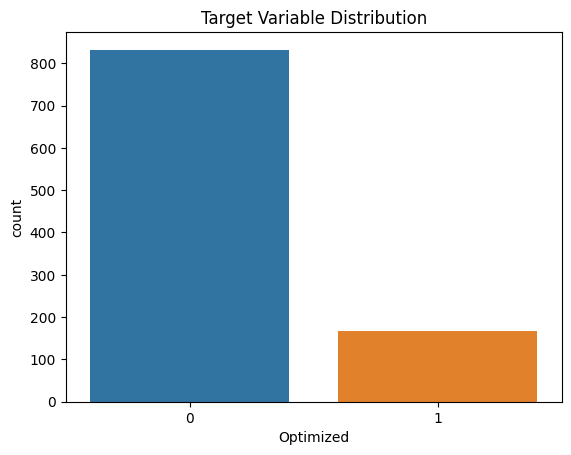

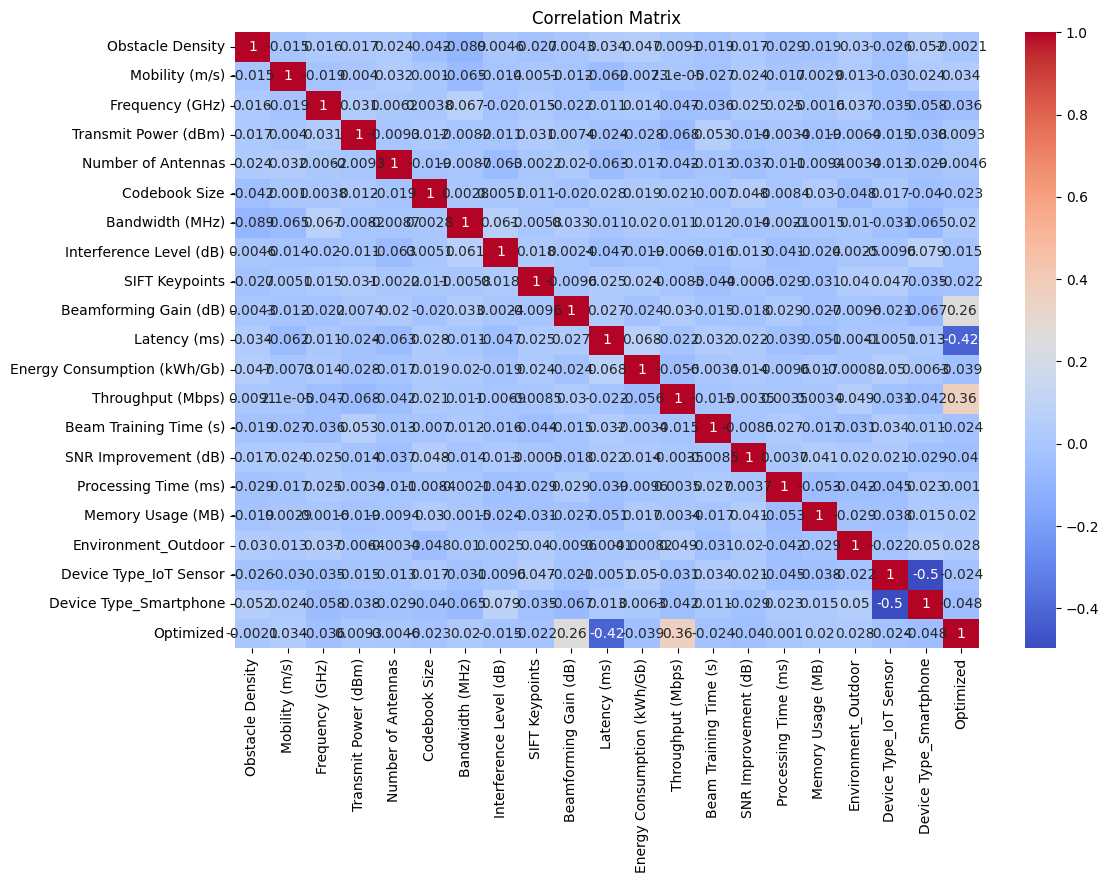

In [10]:
# Κατανομή της μεταβλητής-στόχου
sns.countplot(data=df, x='Optimized')
plt.title("Target Variable Distribution")
plt.show()

# Heatmap συσχέτισης
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [11]:
# Χαρακτηριστικά και στόχος
X = df.drop('Optimized', axis=1)
y = df['Optimized']

# Κανονικοποίηση αριθμητικών δεδομένων
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Διαχωρισμός σε train/test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


              precision    recall  f1-score   support

           0       0.98      1.00      0.99       163
           1       1.00      0.89      0.94        37

    accuracy                           0.98       200
   macro avg       0.99      0.95      0.97       200
weighted avg       0.98      0.98      0.98       200



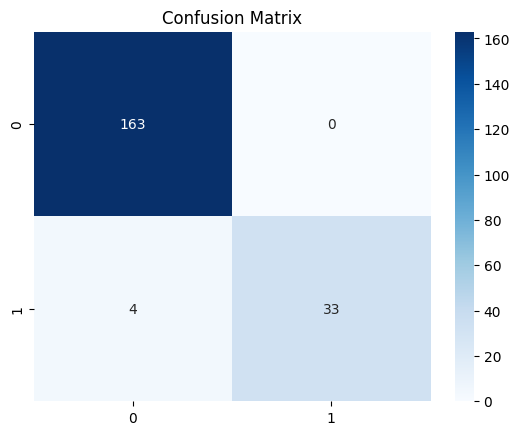

In [12]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


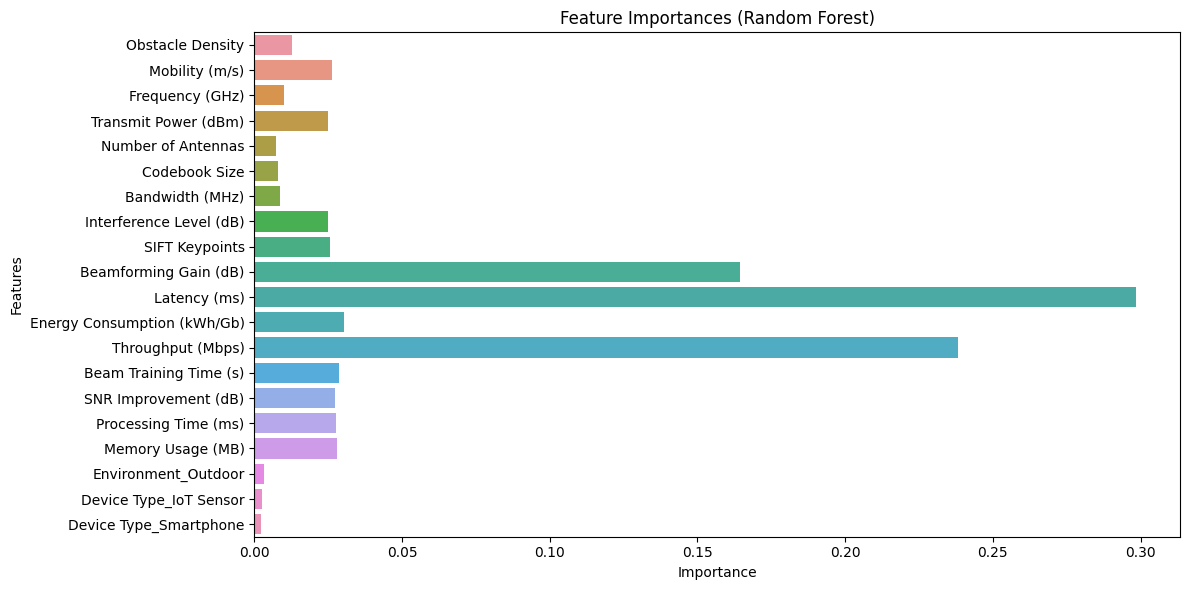

In [13]:
importances = model.feature_importances_
features = df.drop('Optimized', axis=1).columns

# Οπτικοποίηση
plt.figure(figsize=(12, 6))
sns.barplot(x=importances, y=features)
plt.title("Feature Importances (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


In [14]:
!pip install xgboost


In [15]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

print("XGBoost Classification Report:")
print(classification_report(y_test, xgb_pred))


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       163
           1       0.97      1.00      0.99        37

    accuracy                           0.99       200
   macro avg       0.99      1.00      0.99       200
weighted avg       1.00      0.99      1.00       200



In [16]:
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf')
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)

print("SVM Classification Report:")
print(classification_report(y_test, svm_pred))


SVM Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       163
           1       0.78      0.49      0.60        37

    accuracy                           0.88       200
   macro avg       0.84      0.73      0.76       200
weighted avg       0.87      0.88      0.87       200



In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# MLP model
dl_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

dl_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Εκπαίδευση
dl_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)

# Αξιολόγηση
dl_eval = dl_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {dl_eval[1]:.4f}")


2025-05-04 21:12:44.911567: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746393165.252709      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746393165.341705      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-05-04 21:13:04.932894: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call 

Epoch 1/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.4393 - loss: 0.8322 - val_accuracy: 0.8375 - val_loss: 0.4165
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8361 - loss: 0.4514 - val_accuracy: 0.8375 - val_loss: 0.3667
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8306 - loss: 0.3927 - val_accuracy: 0.8375 - val_loss: 0.3156
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8609 - loss: 0.3073 - val_accuracy: 0.8500 - val_loss: 0.2769
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8582 - loss: 0.2967 - val_accuracy: 0.8875 - val_loss: 0.2400
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8827 - loss: 0.2437 - val_accuracy: 0.9125 - val_loss: 0.2082
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9286 - loss: 0.2025 - val_accuracy: 0.9125 - val_loss: 0.1876
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9032 - loss: 0.2159 - val_accuracy: 0.9250 - val_loss

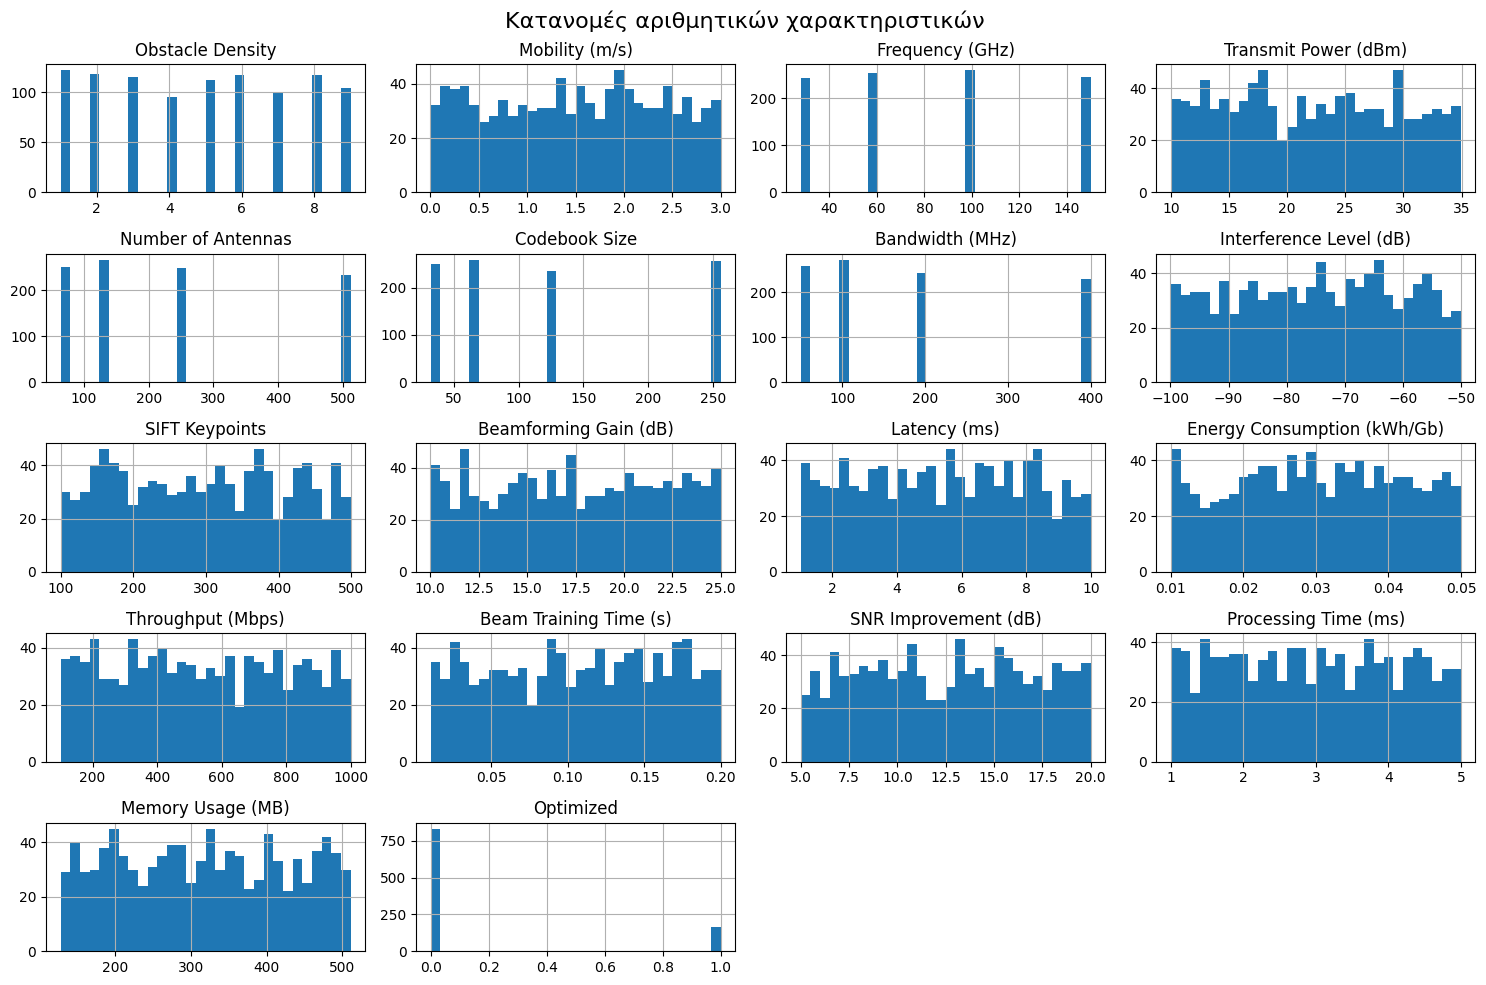

In [18]:
# Ποσοτικά χαρακτηριστικά
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

df[numeric_cols].hist(bins=30, figsize=(15, 10))
plt.suptitle("Κατανομές αριθμητικών χαρακτηριστικών", fontsize=16)
plt.tight_layout()
plt.show()


In [21]:
df.columns

Index(['Obstacle Density', 'Mobility (m/s)', 'Frequency (GHz)',
       'Transmit Power (dBm)', 'Number of Antennas', 'Codebook Size',
       'Bandwidth (MHz)', 'Interference Level (dB)', 'SIFT Keypoints',
       'Beamforming Gain (dB)', 'Latency (ms)', 'Energy Consumption (kWh/Gb)',
       'Throughput (Mbps)', 'Beam Training Time (s)', 'SNR Improvement (dB)',
       'Processing Time (ms)', 'Memory Usage (MB)', 'Environment_Outdoor',
       'Device Type_IoT Sensor', 'Device Type_Smartphone', 'Optimized'],
      dtype='object')

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


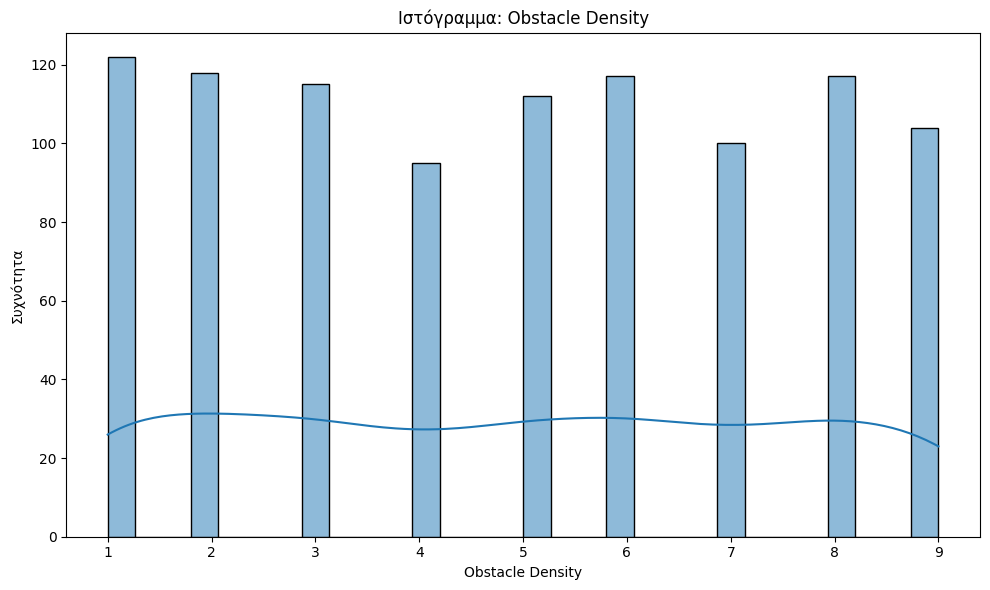

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


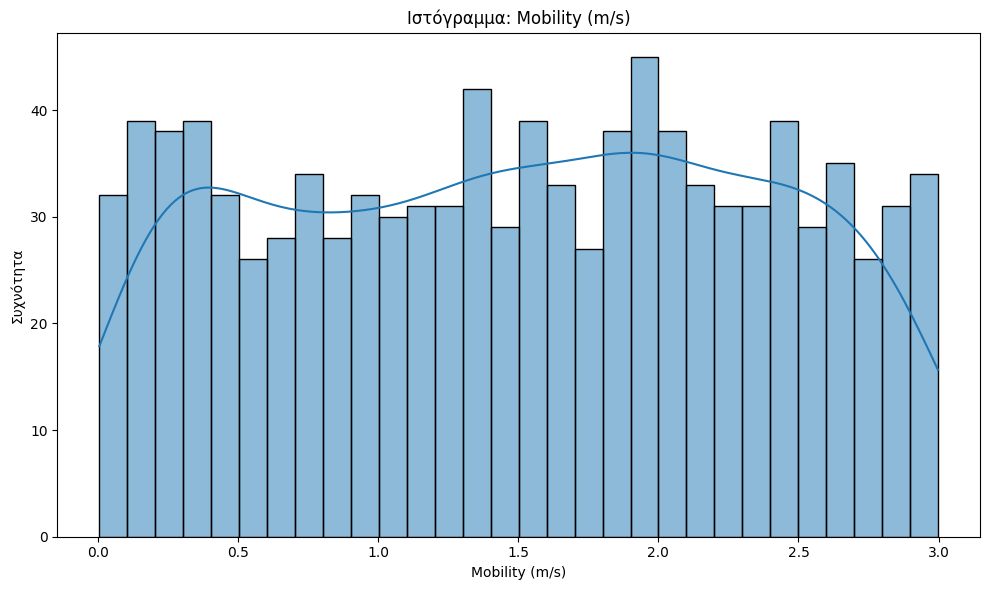

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


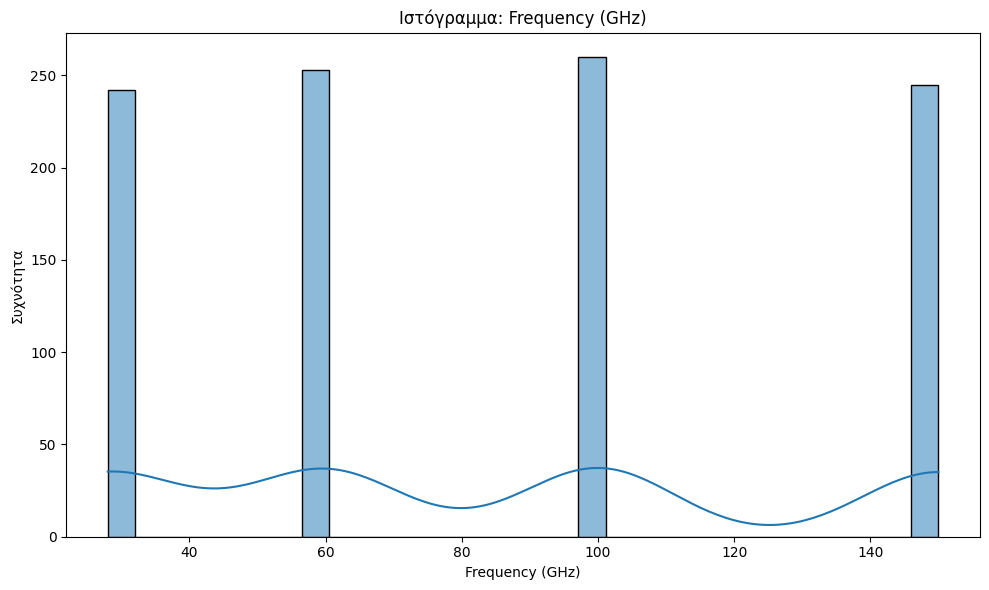

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


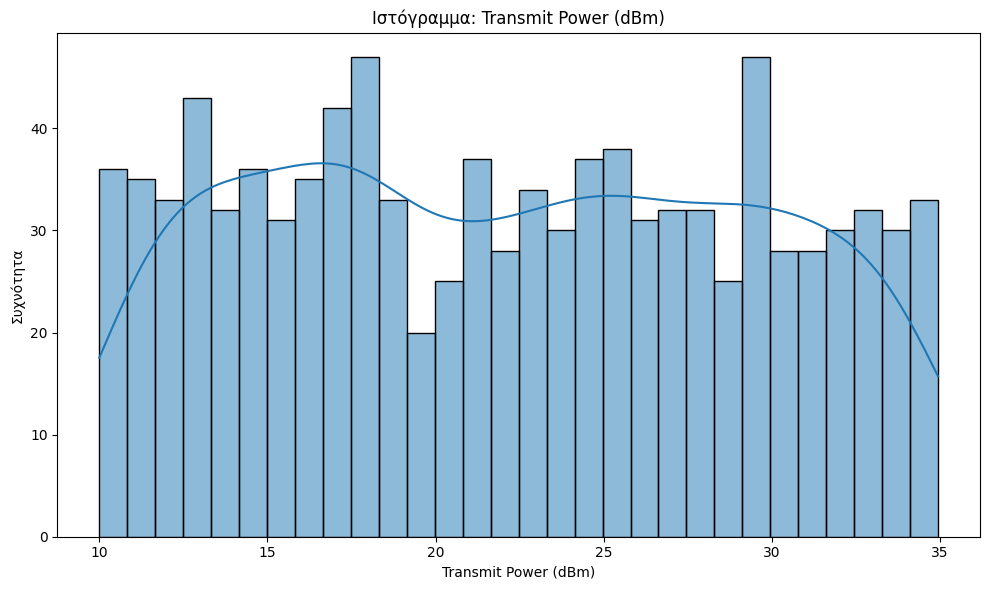

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


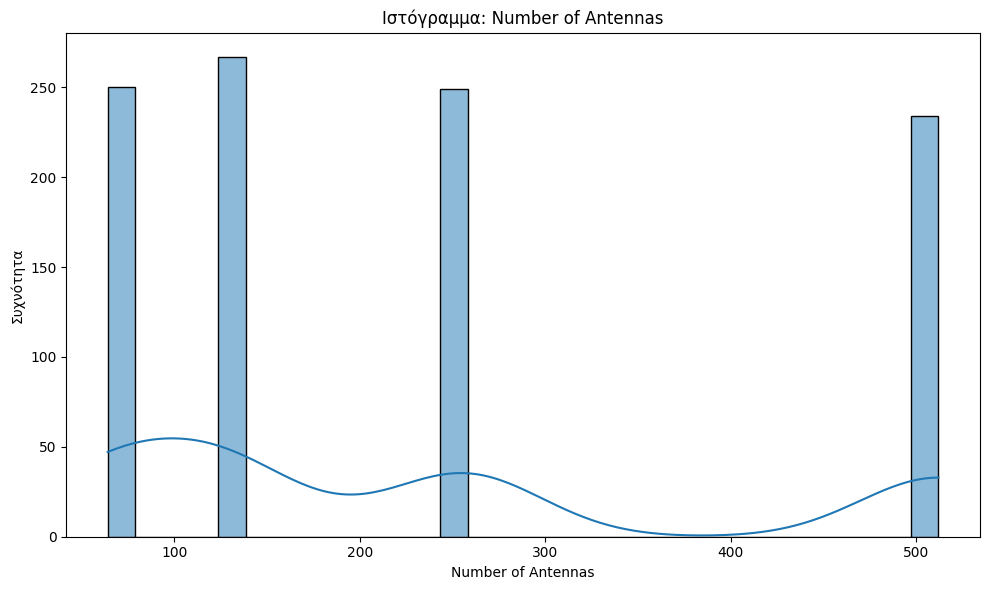

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


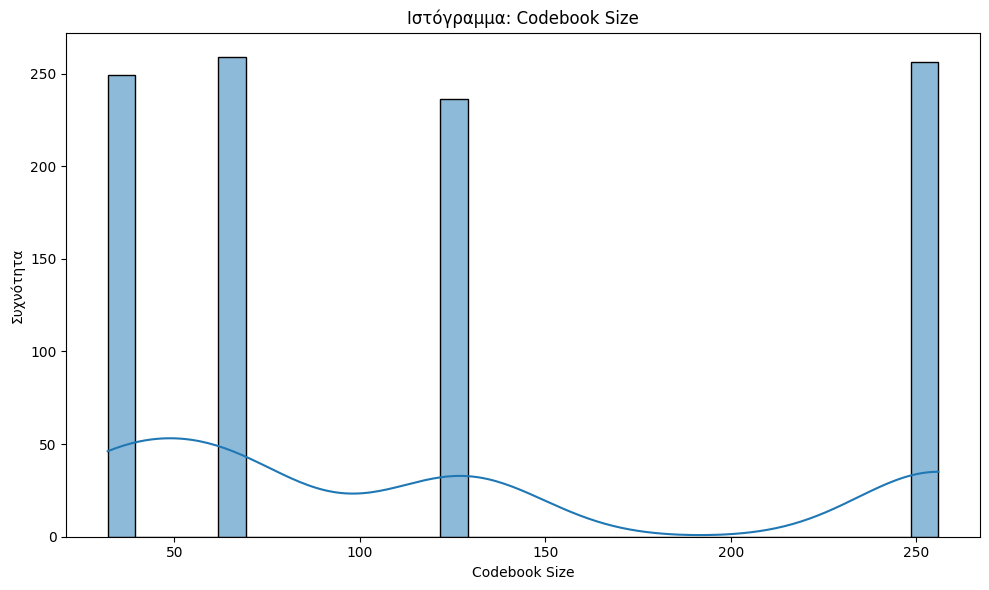

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


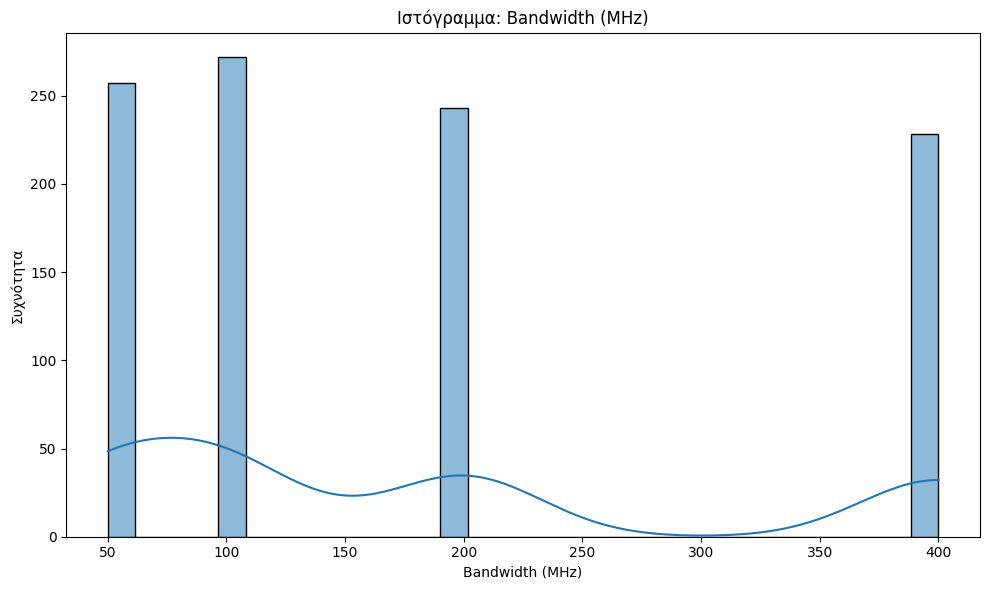

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


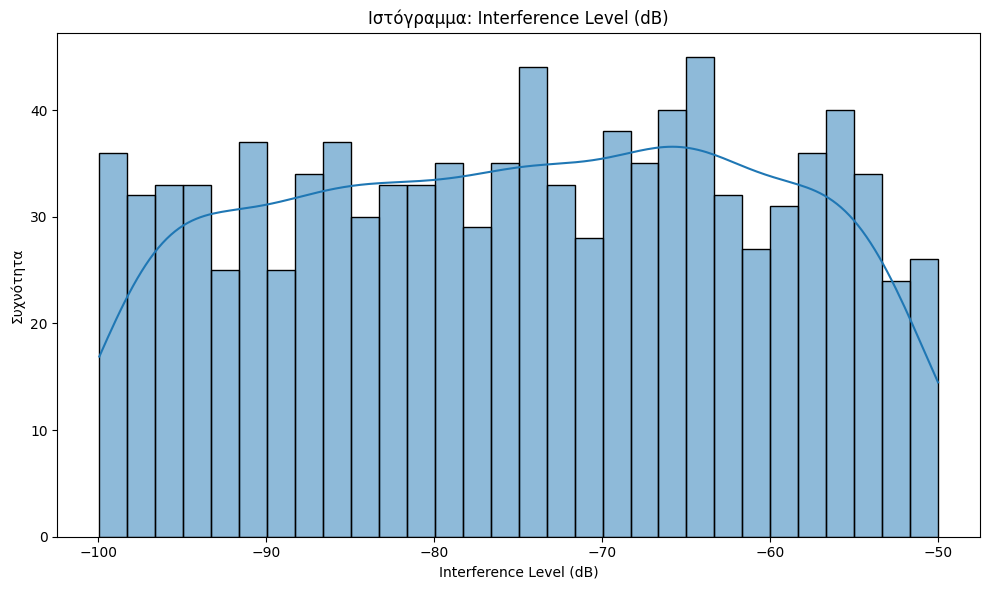

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


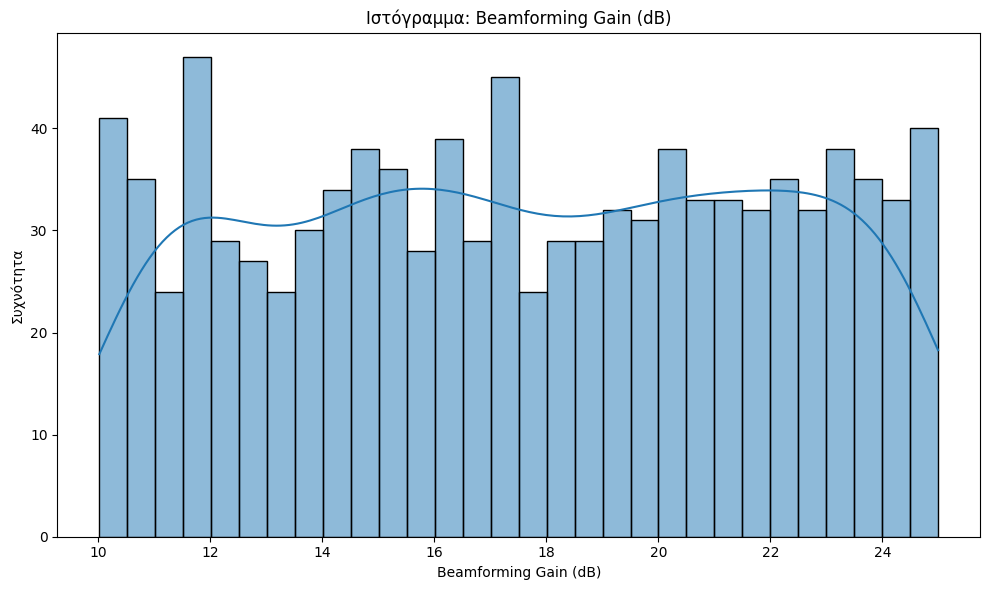

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


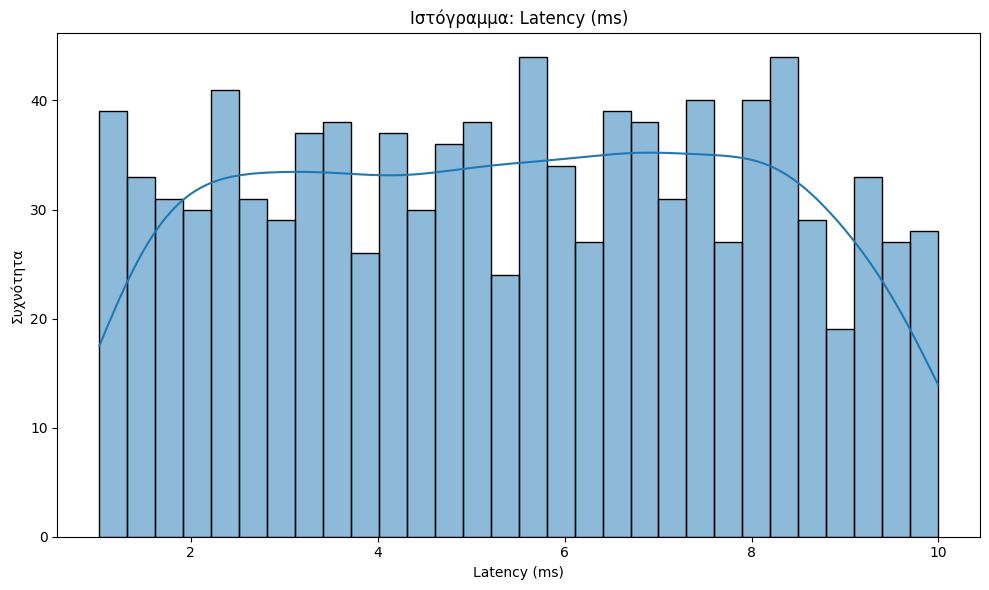

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


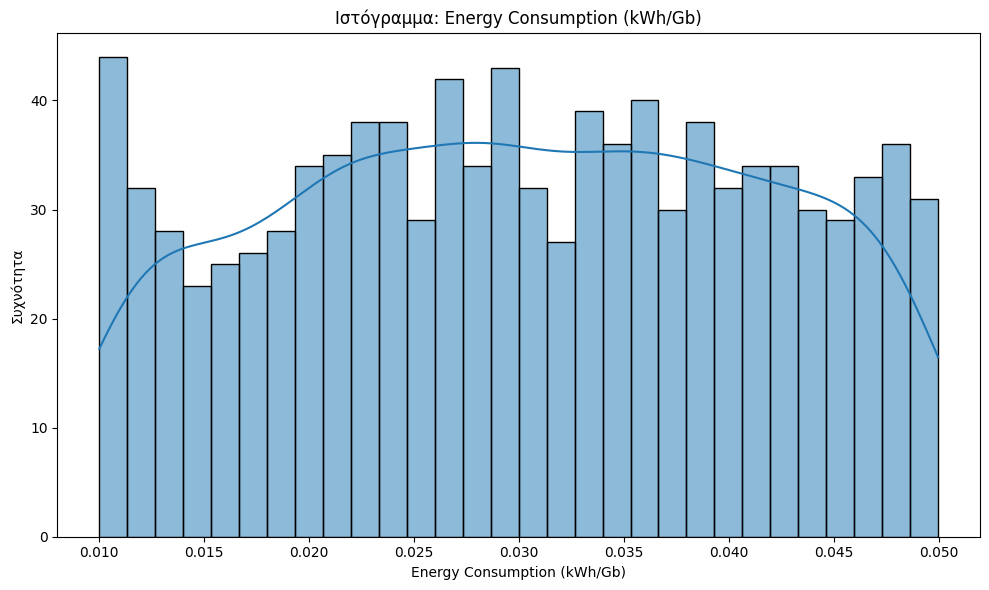

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


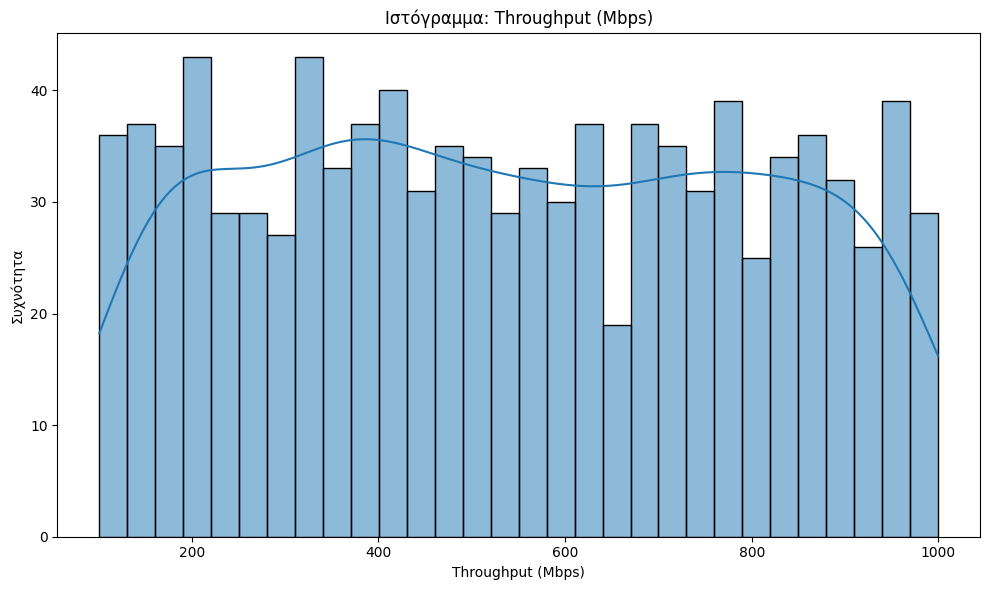

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


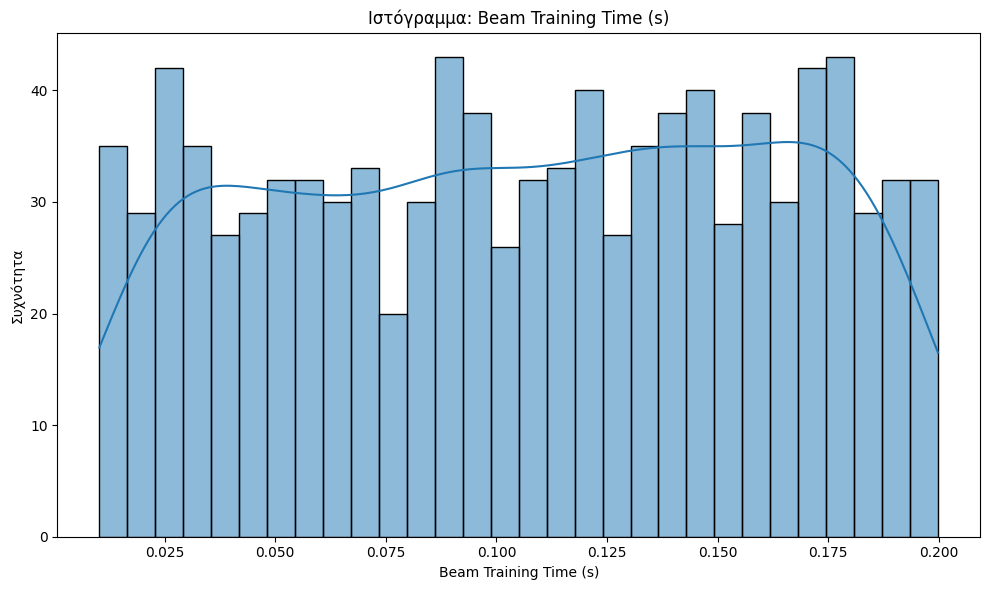

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


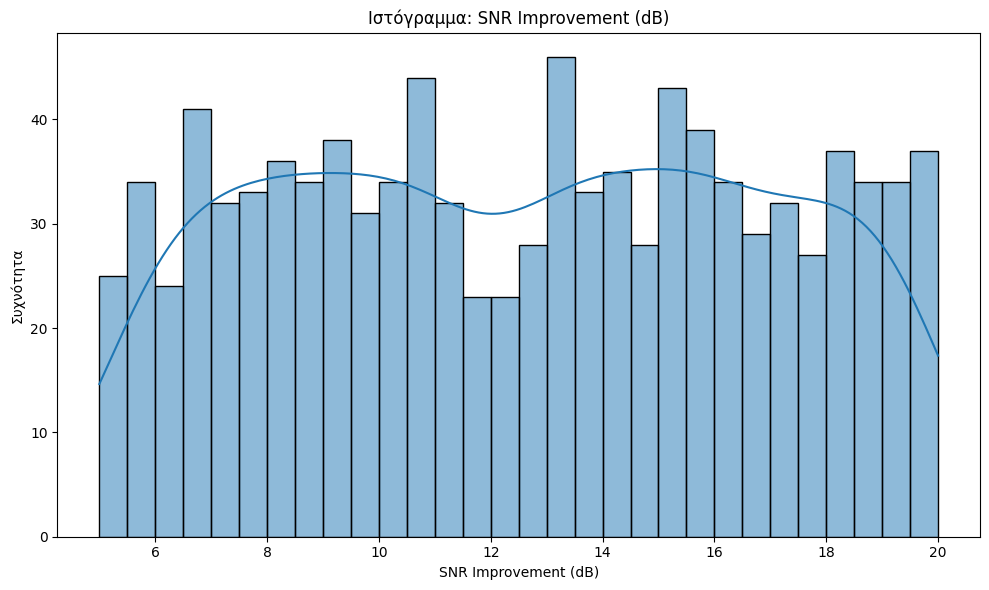

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


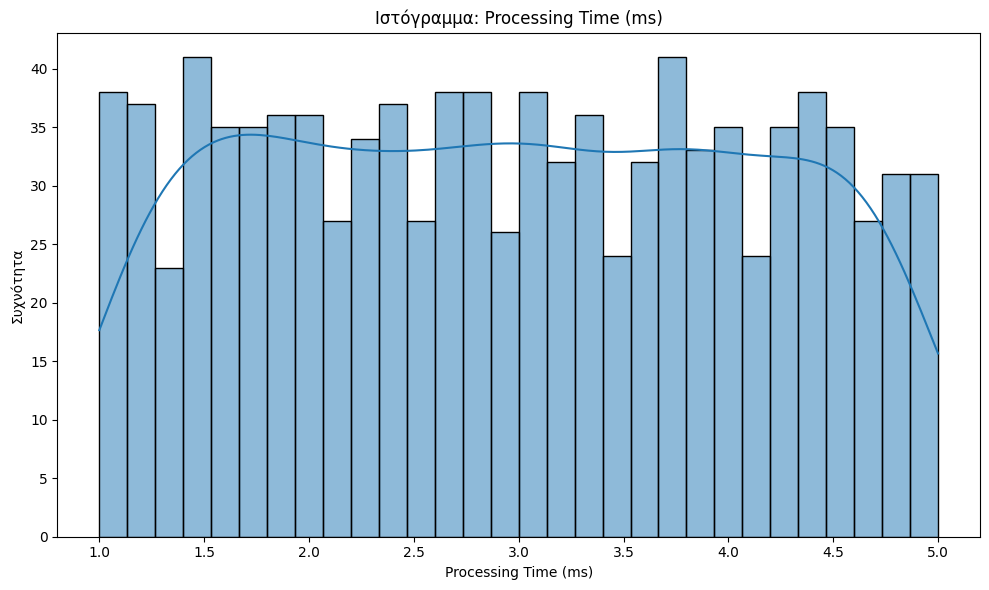

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


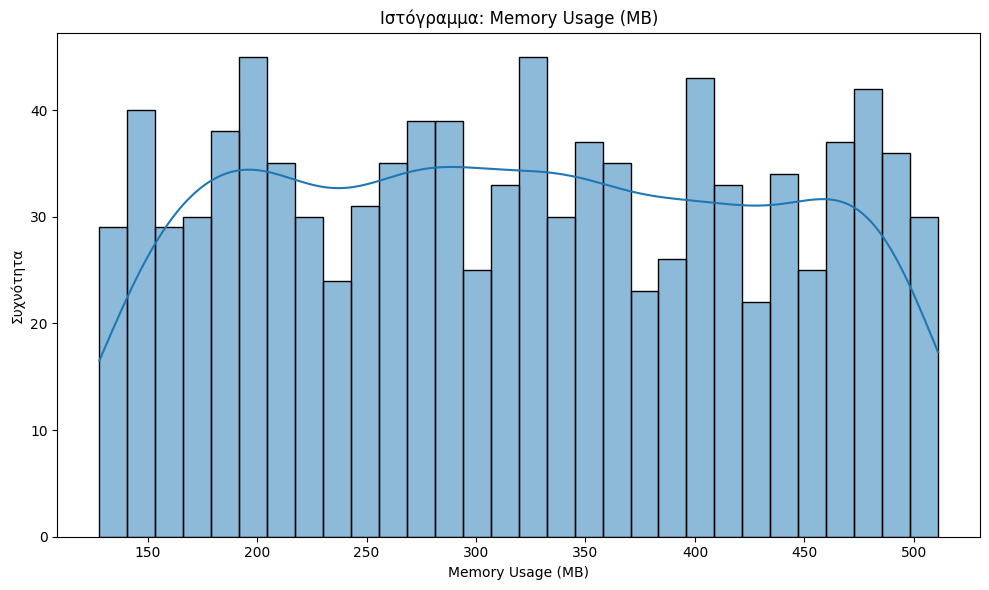

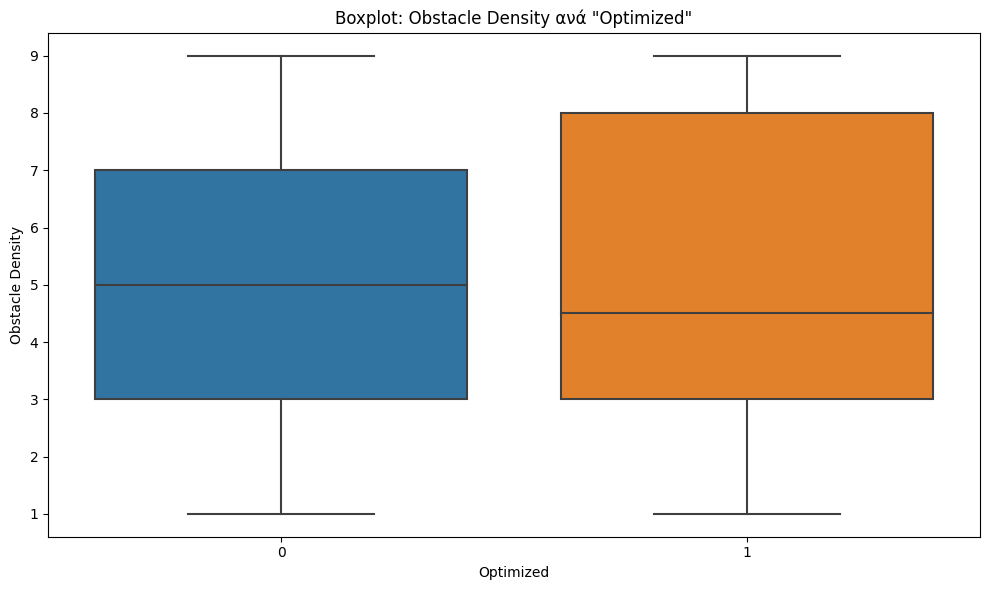

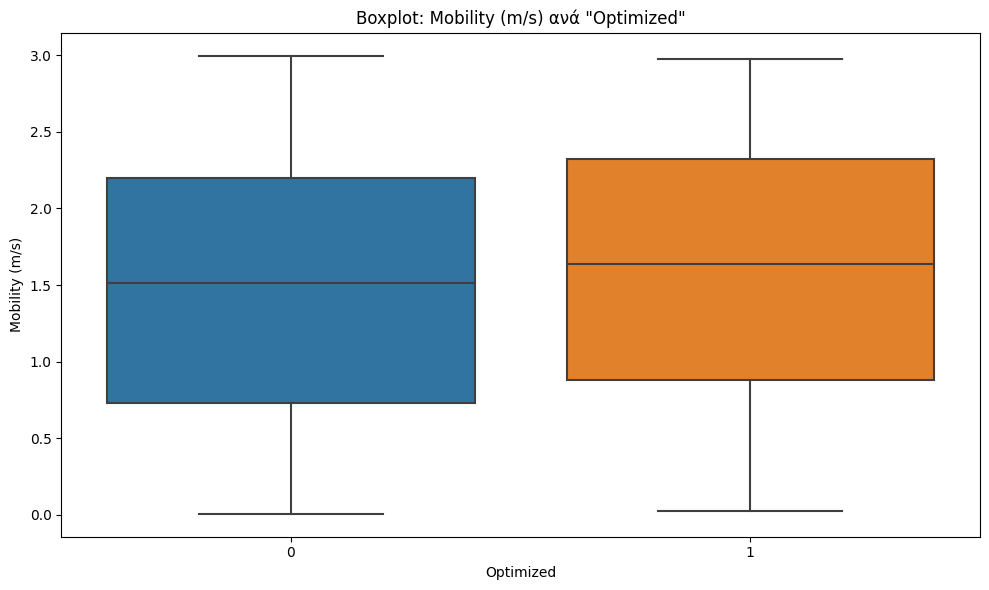

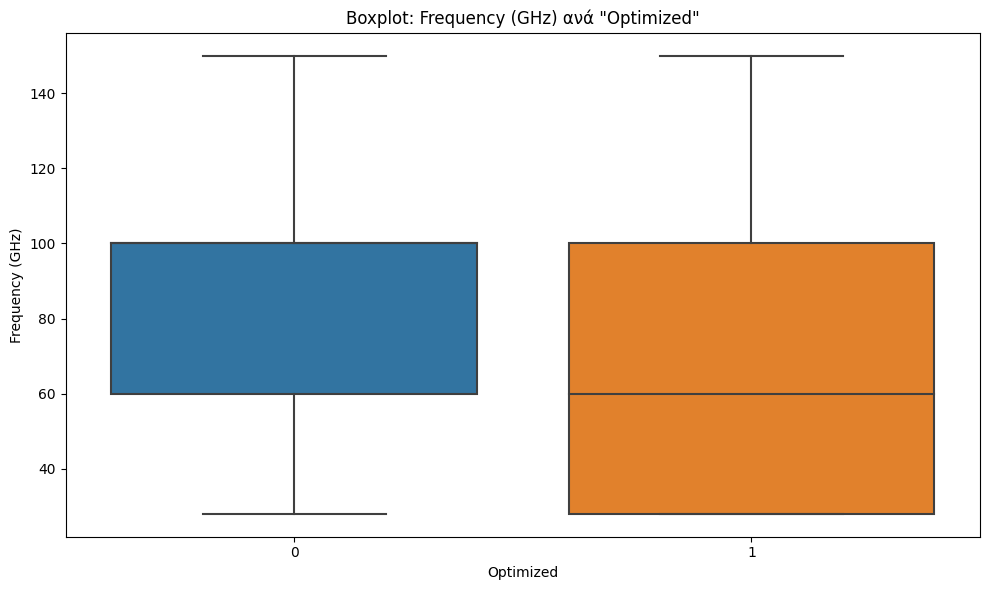

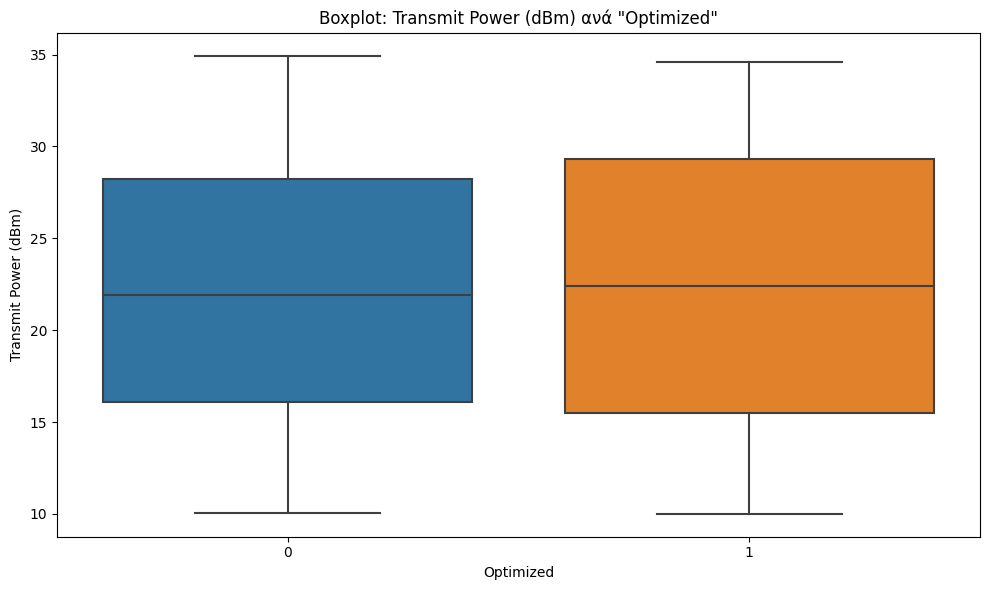

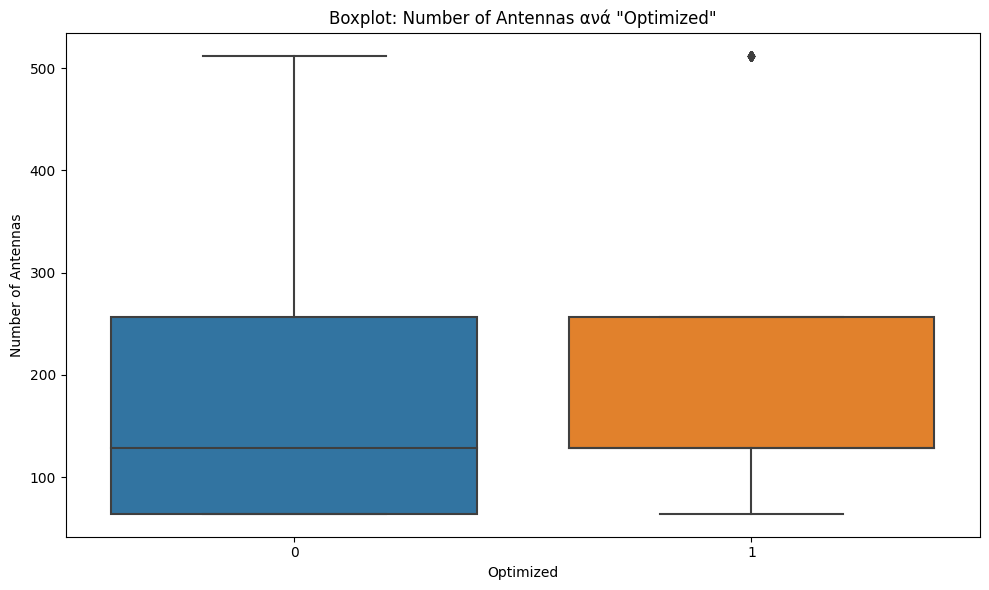

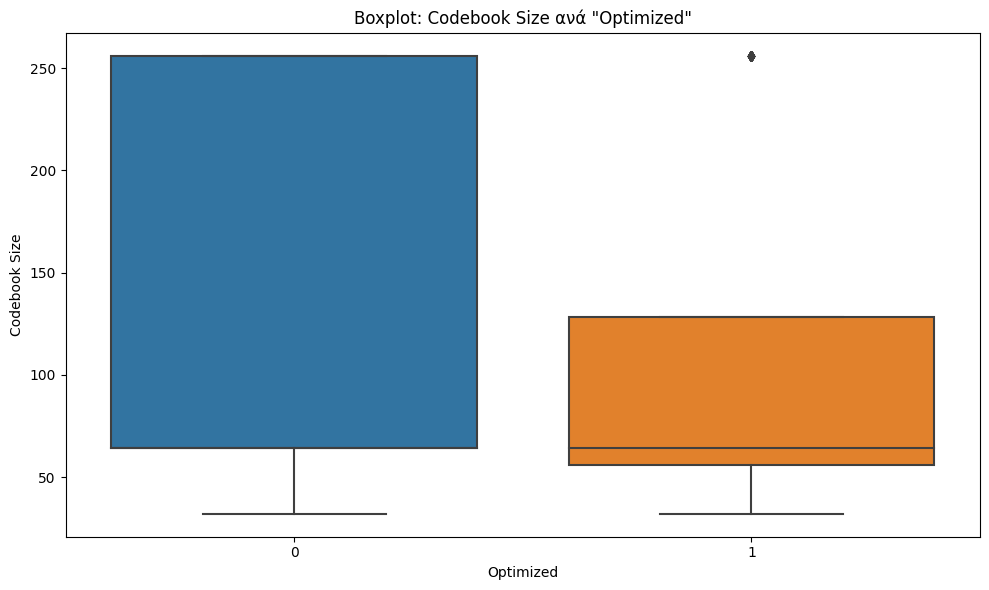

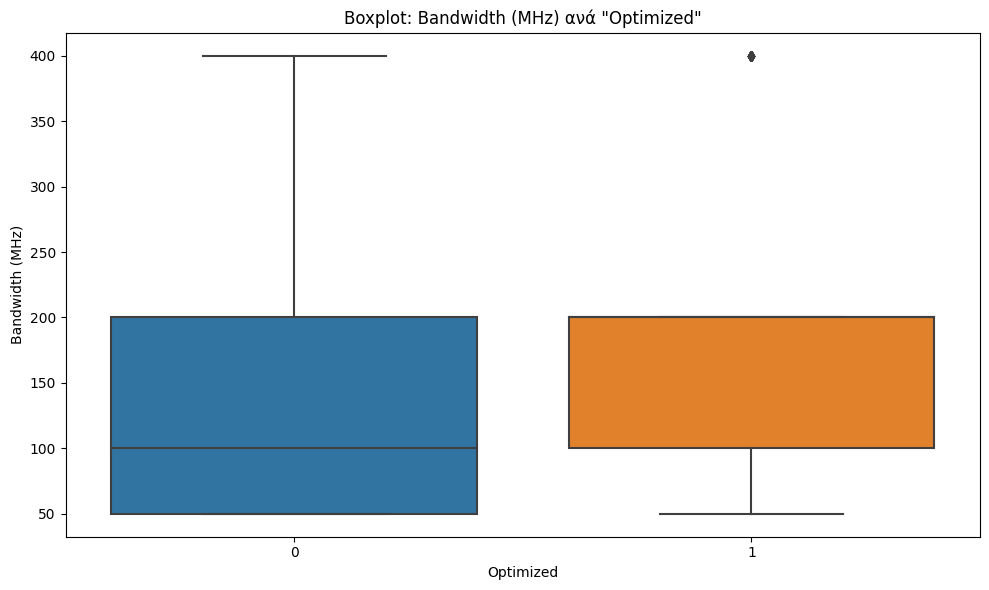

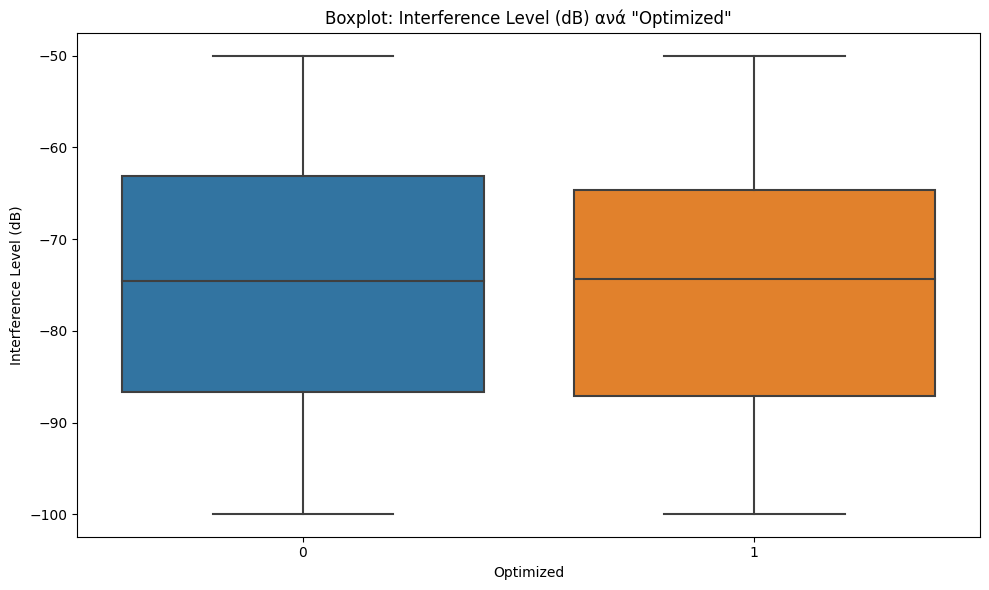

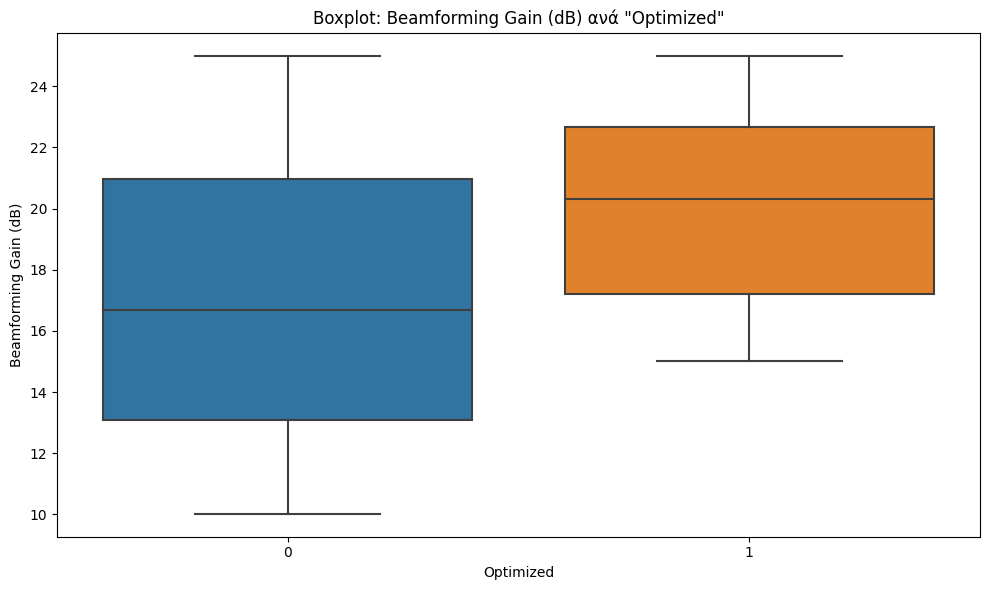

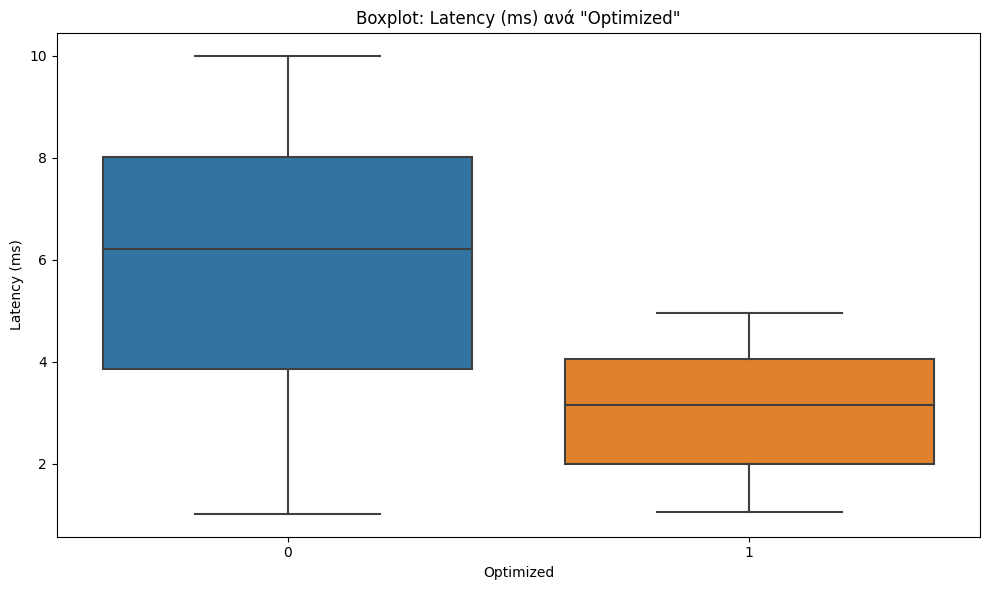

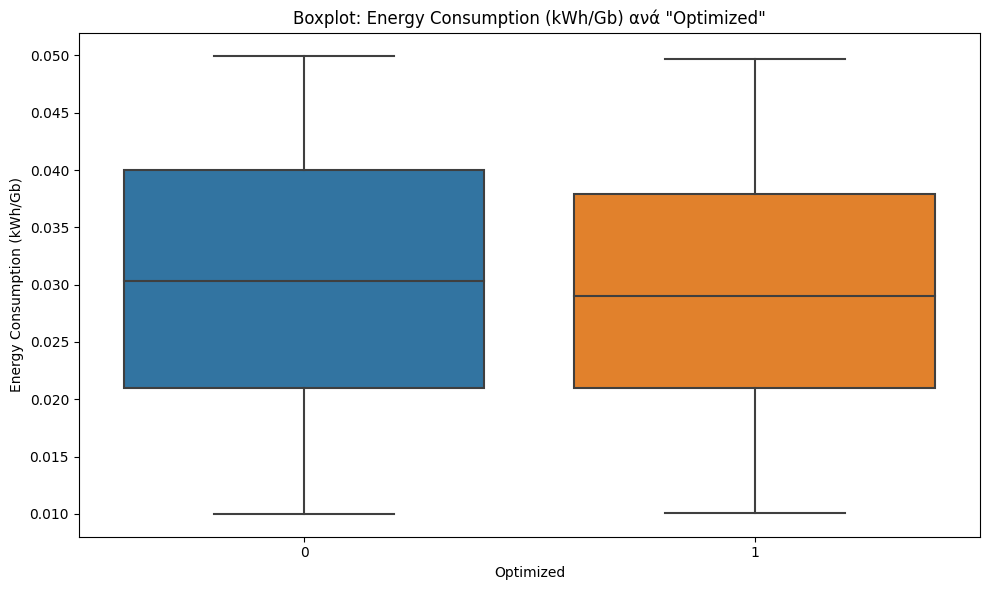

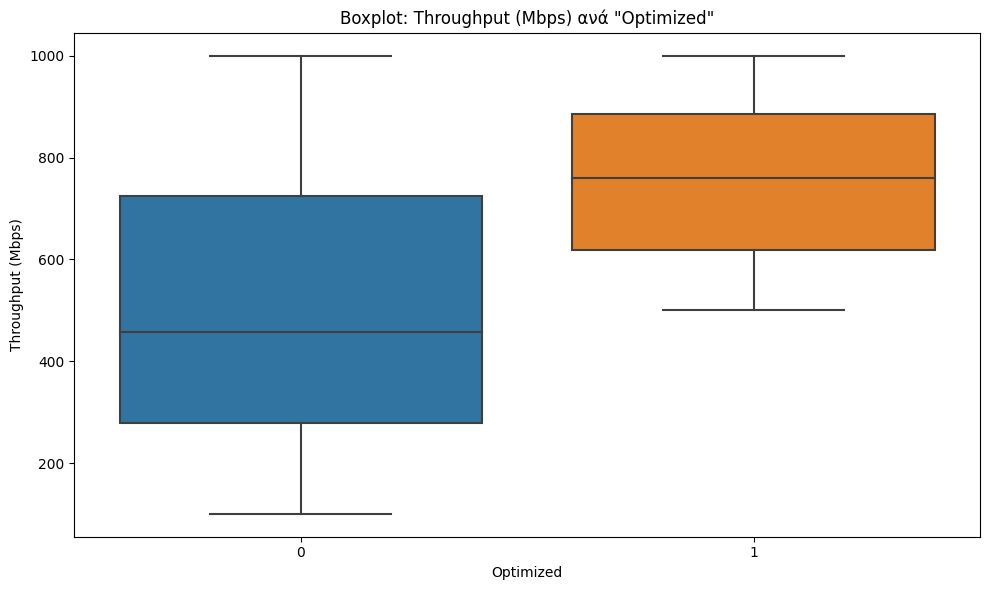

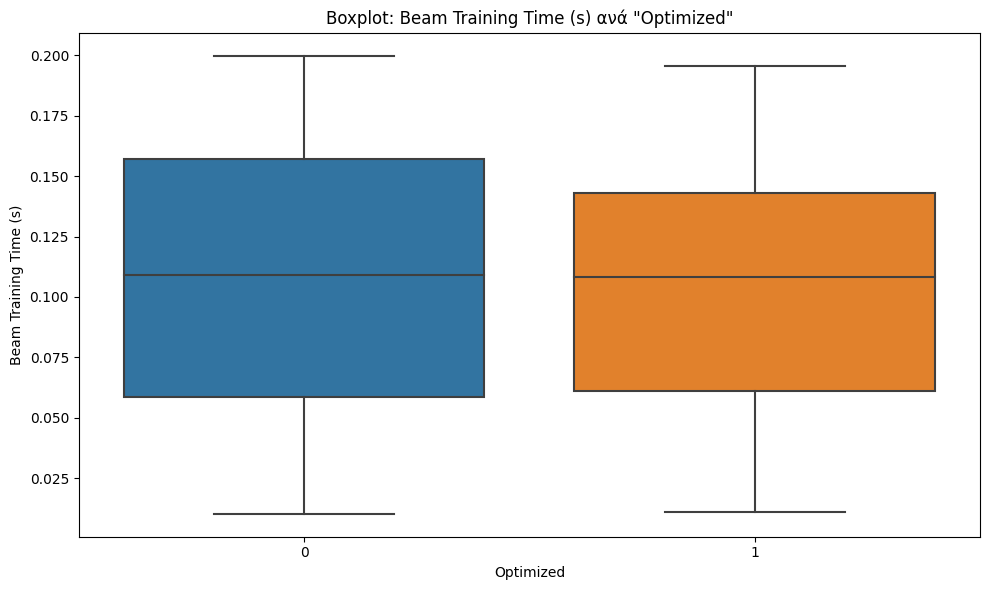

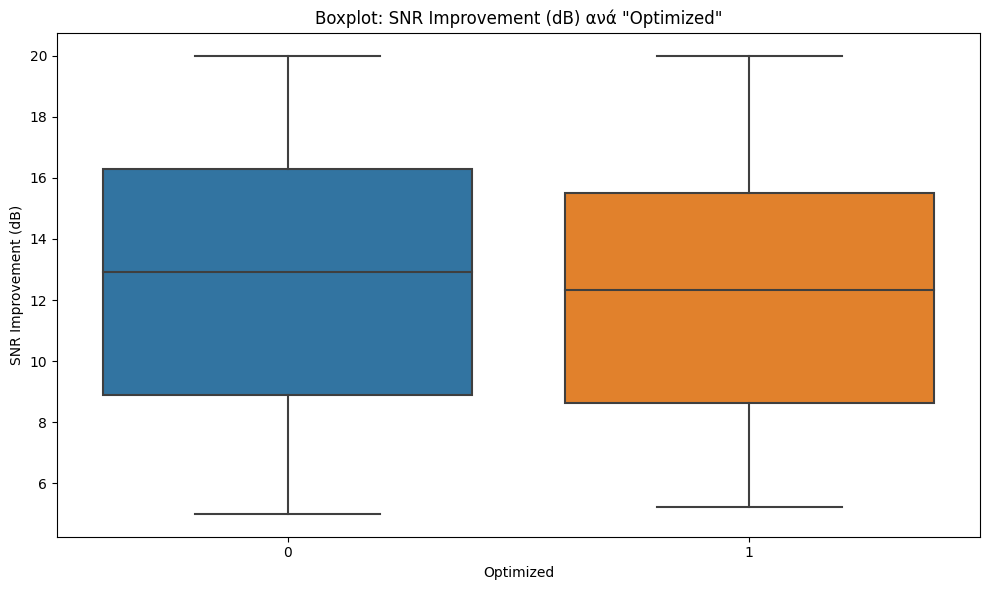

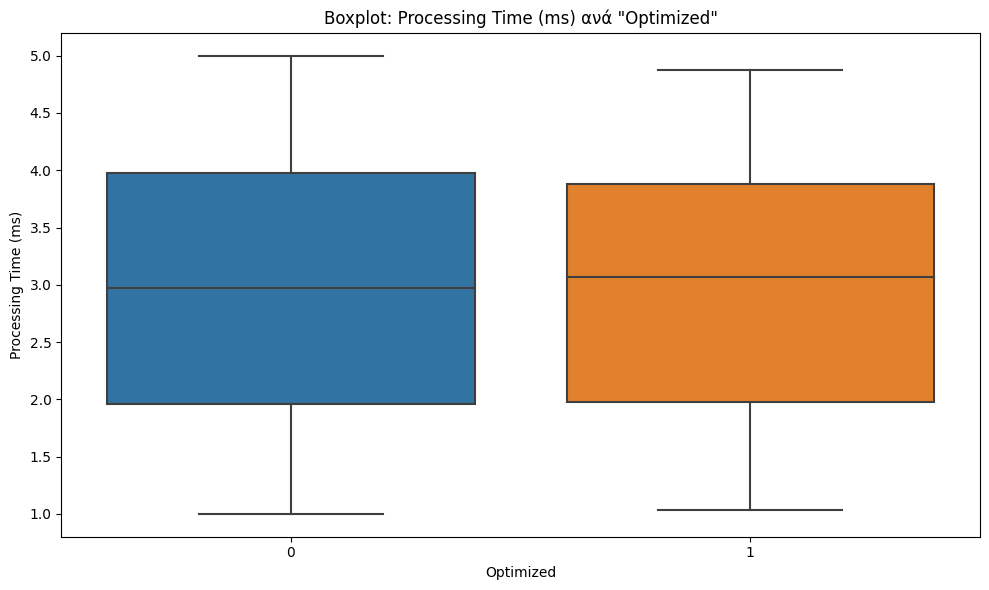

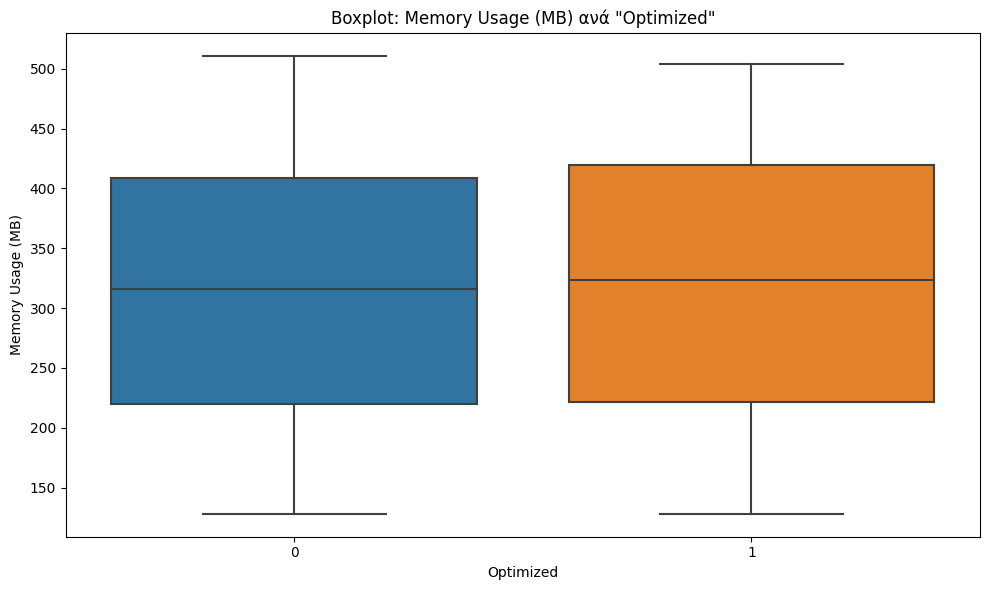

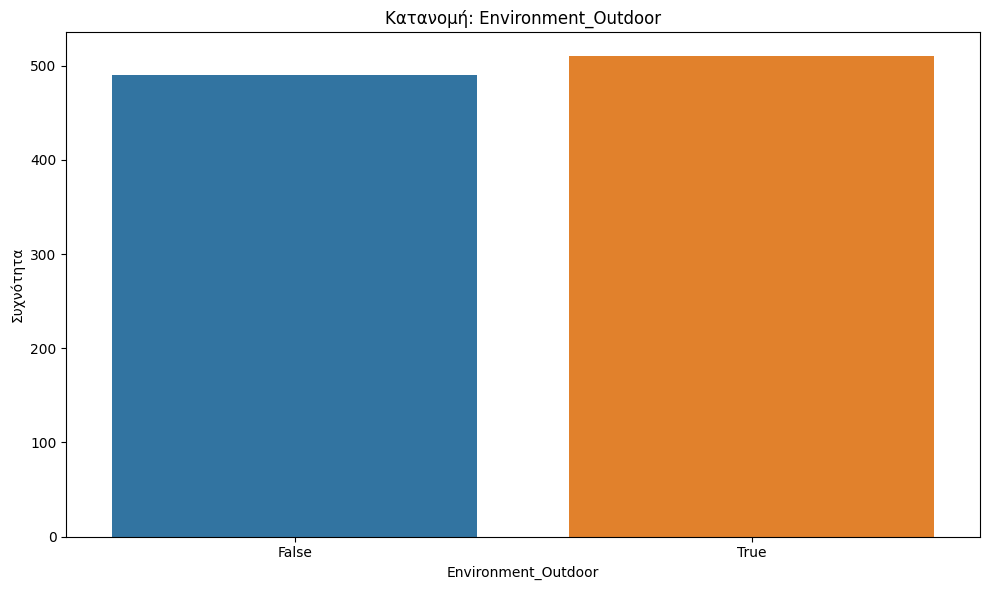

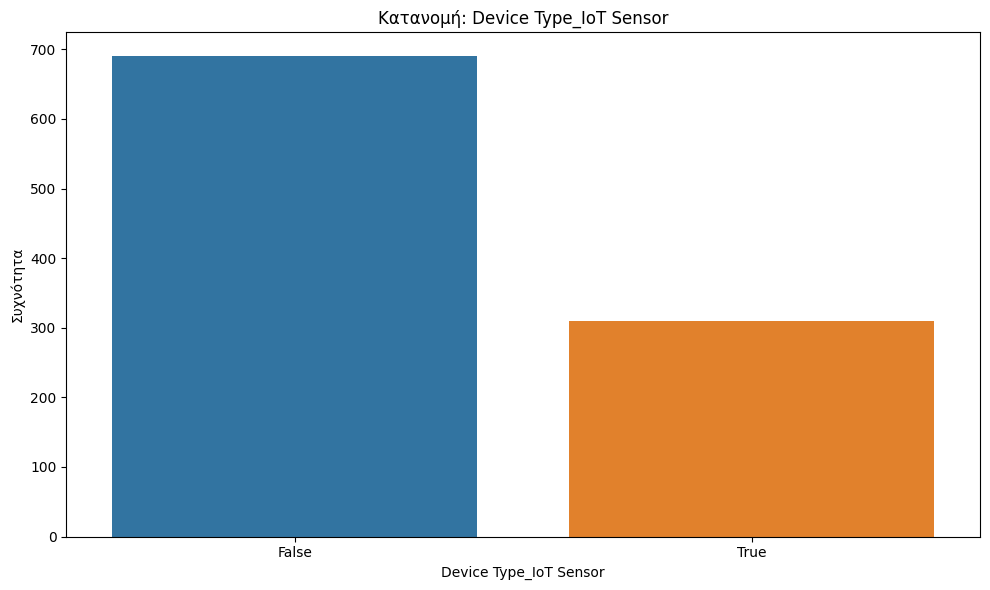

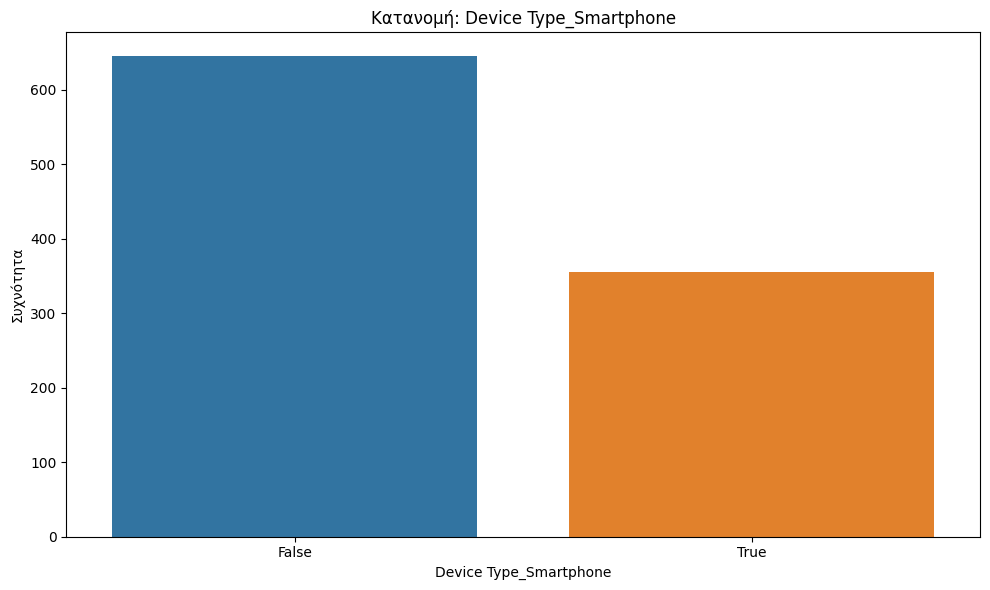

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ορισμός χαρακτηριστικών
continuous_features = [
    'Obstacle Density', 'Mobility (m/s)', 'Frequency (GHz)', 'Transmit Power (dBm)', 
    'Number of Antennas', 'Codebook Size', 'Bandwidth (MHz)', 'Interference Level (dB)',
    'Beamforming Gain (dB)', 'Latency (ms)', 'Energy Consumption (kWh/Gb)', 'Throughput (Mbps)', 
    'Beam Training Time (s)', 'SNR Improvement (dB)', 'Processing Time (ms)', 'Memory Usage (MB)'
]

categorical_features = ['Environment_Outdoor', 'Device Type_IoT Sensor', 'Device Type_Smartphone']

# Σχέδιο γραφημάτων
plt.rcParams['figure.figsize'] = (10, 6)

# Ιστογράμματα για συνεχείς μεταβλητές
for feature in continuous_features:
    plt.figure()
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f'Ιστόγραμμα: {feature}')
    plt.xlabel(feature)
    plt.ylabel('Συχνότητα')
    plt.tight_layout()
    plt.show()

# Boxplot για συνεχείς μεταβλητές, χωρισμένα ανά "Optimized"
for feature in continuous_features:
    plt.figure()
    sns.boxplot(x='Optimized', y=feature, data=df)
    plt.title(f'Boxplot: {feature} ανά "Optimized"')
    plt.xlabel('Optimized')
    plt.ylabel(feature)
    plt.tight_layout()
    plt.show()

# Διαγράμματα κατηγορίας για μεταβλητές με κατηγορηματικά δεδομένα
for feature in categorical_features:
    plt.figure()
    sns.countplot(x=feature, data=df)
    plt.title(f'Κατανομή: {feature}')
    plt.xlabel(feature)
    plt.ylabel('Συχνότητα')
    plt.tight_layout()
    plt.show()



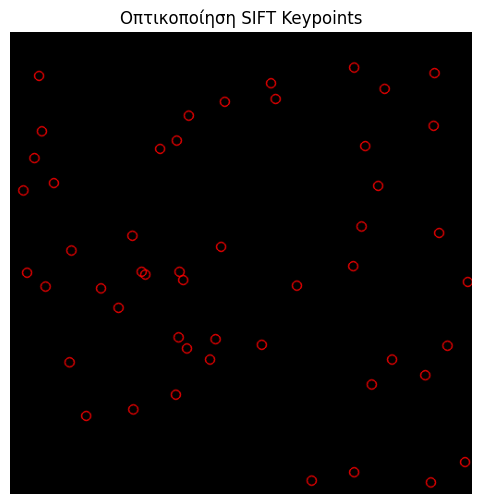

In [26]:
import cv2
import numpy as np

# Δημιουργία παραδείγματος εικόνας και χαρακτηριστικών SIFT
img = np.zeros((500, 500), dtype=np.uint8)
sift = cv2.SIFT_create()

# Προσομοίωση SIFT keypoints
keypoints = [cv2.KeyPoint(np.random.randint(0, 500), np.random.randint(0, 500), 10) for _ in range(50)]

# Σχεδίαση των keypoints στην εικόνα
img_with_keypoints = cv2.drawKeypoints(img, keypoints, None, (255, 0, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Εμφάνιση
plt.imshow(img_with_keypoints, cmap='gray')
plt.title('Οπτικοποίηση SIFT Keypoints')
plt.axis('off')
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


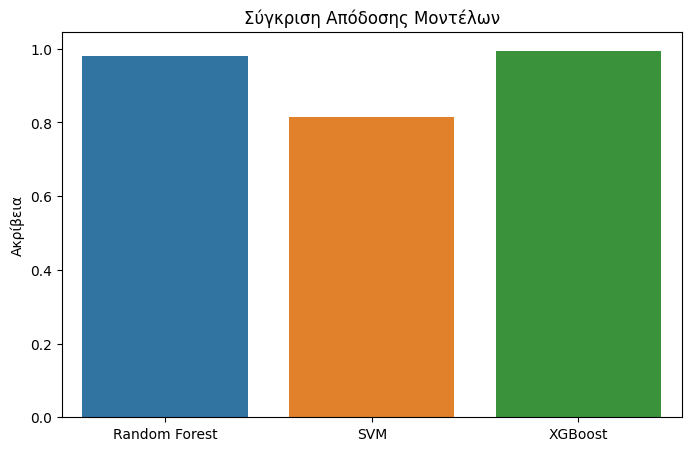

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Εκπαίδευση και αξιολόγηση μοντέλων
models = {
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'XGBoost': XGBClassifier()
}

accuracies = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracies[name] = accuracy_score(y_test, y_pred)

# Σχεδίαση σύγκρισης ακρίβειας
plt.figure(figsize=(8, 5))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()))
plt.title('Σύγκριση Απόδοσης Μοντέλων')
plt.ylabel('Ακρίβεια')
plt.show()


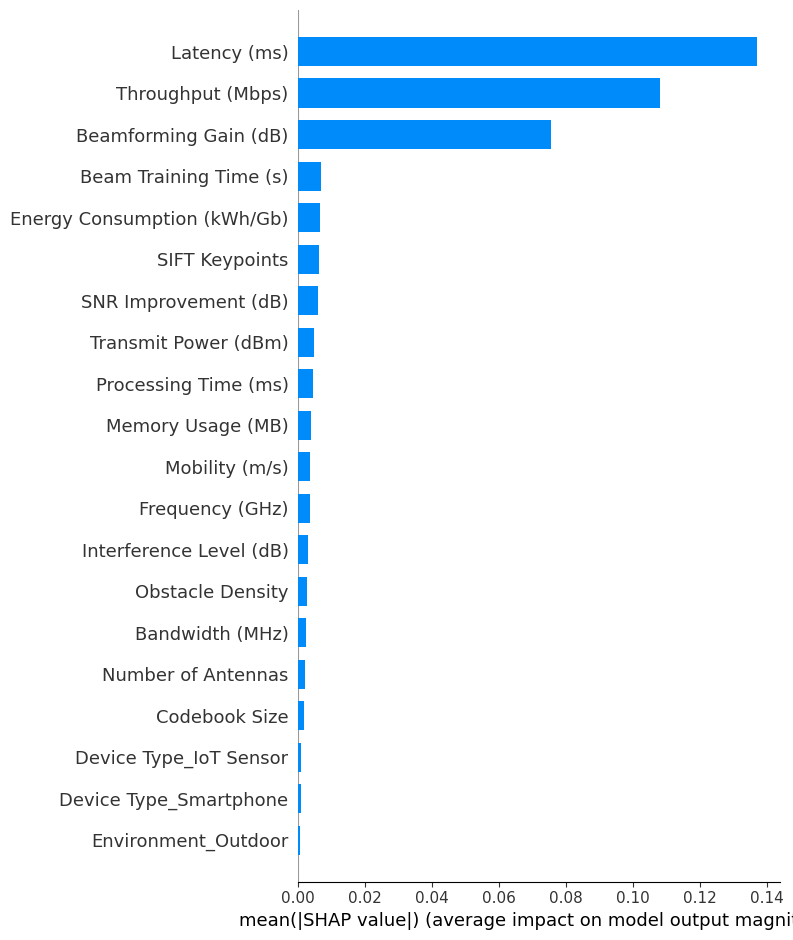

In [29]:
from sklearn.ensemble import RandomForestClassifier
import shap

# Προετοιμασία δεδομένων
X = df.drop(columns=['Optimized'])
y = df['Optimized']

# Προκαταρκτική μετατροπή κατηγορικών χαρακτηριστικών σε dummies
X = pd.get_dummies(X)

# Διαχωρισμός σε εκπαιδευτικά και τεστ δεδομένα
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Δημιουργία και εκπαίδευση μοντέλου Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Χρήση μοντέλου Random Forest για το SHAP
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)

# Διάγραμμα συνολικής σημαντικότητας χαρακτηριστικών
shap.summary_plot(shap_values[1], X_test, plot_type="bar")



Epoch 1/10


Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.7506 - loss: 8.4811 - val_accuracy: 0.7550 - val_loss: 3.8671
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7864 - loss: 2.2265 - val_accuracy: 0.6650 - val_loss: 2.4966
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7567 - loss: 1.7916 - val_accuracy: 0.7900 - val_loss: 2.5623
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8038 - loss: 1.8351 - val_accuracy: 0.7250 - val_loss: 1.2404
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7516 - loss: 1.3845 - val_accuracy: 0.7950 - val_loss: 2.3056
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7953 - loss: 1.5378 - val_accuracy: 0.7000 - val_loss: 1.2937
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8170 - loss: 0.7384 - val_accuracy: 0.7500 - val_loss: 1.0697
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8015 - loss: 0.7072 - val_accuracy: 0.6600 - val_loss: 1.2850
Ep

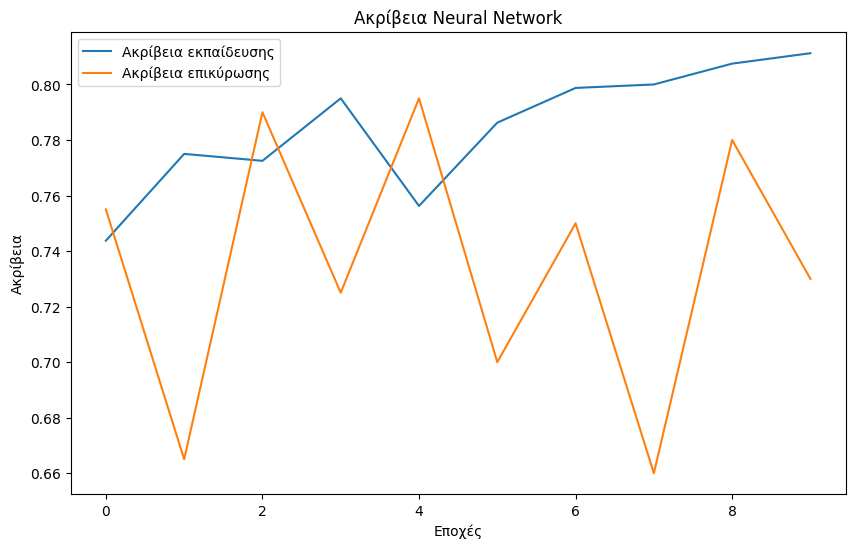

In [30]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# Δημιουργία μοντέλου
model_nn = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Συμπυκνώσεις μοντέλου
model_nn.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Εκπαίδευση
history = model_nn.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Αξιολόγηση
plt.plot(history.history['accuracy'], label='Ακρίβεια εκπαίδευσης')
plt.plot(history.history['val_accuracy'], label='Ακρίβεια επικύρωσης')
plt.title('Ακρίβεια Neural Network')
plt.xlabel('Εποχές')
plt.ylabel('Ακρίβεια')
plt.legend()
plt.show()


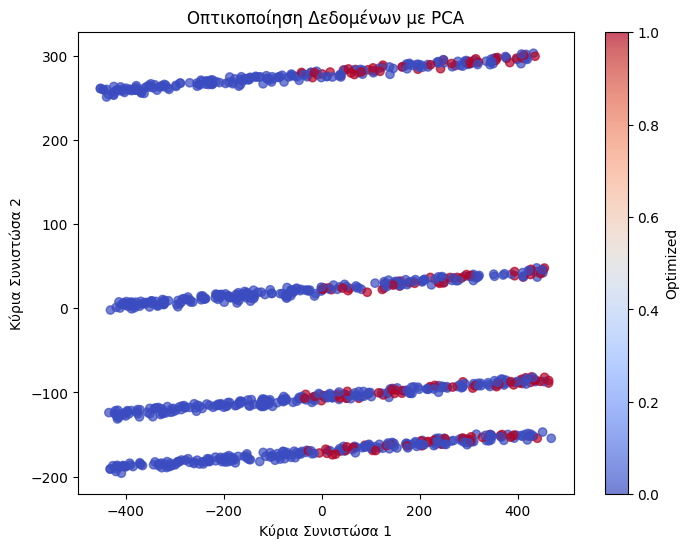

In [31]:
from sklearn.decomposition import PCA

# Μείωση σε 2 διαστάσεις με PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

# Οπτικοποίηση των δεδομένων με PCA
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=y, cmap='coolwarm', alpha=0.7)
plt.title('Οπτικοποίηση Δεδομένων με PCA')
plt.xlabel('Κύρια Συνιστώσα 1')
plt.ylabel('Κύρια Συνιστώσα 2')
plt.colorbar(label='Optimized')
plt.show()


In [32]:
from sklearn.preprocessing import StandardScaler

# Κανονικοποίηση δεδομένων
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Εκπαίδευση μοντέλου με τα κανονικοποιημένα δεδομένα
X_train_scaled, X_test_scaled = train_test_split(X_scaled, test_size=0.2, random_state=42)

# Δημιουργία και εκπαίδευση μοντέλου με τα κανονικοποιημένα δεδομένα
model_nn.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_data=(X_test_scaled, y_test))


Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7533 - loss: 0.5606 - val_accuracy: 0.8150 - val_loss: 0.4184
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8349 - loss: 0.3559 - val_accuracy: 0.8200 - val_loss: 0.3743
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8674 - loss: 0.2740 - val_accuracy: 0.8300 - val_loss: 0.3451
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8462 - loss: 0.2862 - val_accuracy: 0.8250 - val_loss: 0.3239
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8676 - loss: 0.2530 - val_accuracy: 0.8500 - val_loss: 0.3126
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8935 - loss: 0.2060 - val_accuracy: 0.8550 - val_loss: 0.3018
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9172 - loss: 0.2057 - val_accuracy: 0.8800 - val_loss: 0.2912
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9226 - loss: 0.1877 - val_accuracy: 0.8900 - val_loss:

In [34]:
import plotly.express as px

# Διαδραστικό διάγραμμα κατανομής
fig = px.histogram(df, x="Beamforming Gain (dB)", title="Κατανομή Beamforming Gain")
fig.show()


In [35]:
import lime
from lime.lime_tabular import LimeTabularExplainer

# Δημιουργία του LIME Explainer
explainer = LimeTabularExplainer(X_train.values, feature_names=X_train.columns, class_names=['Unoptimized', 'Optimized'], discretize_continuous=True)

# Επιλογή δείγματος από το σύνολο τεστ
idx = 10  # Μπορείς να αλλάξεις το δείγμα
exp = explainer.explain_instance(X_test.iloc[idx].values, rf_model.predict_proba, num_features=5)

# Οπτικοποίηση
exp.show_in_notebook()


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



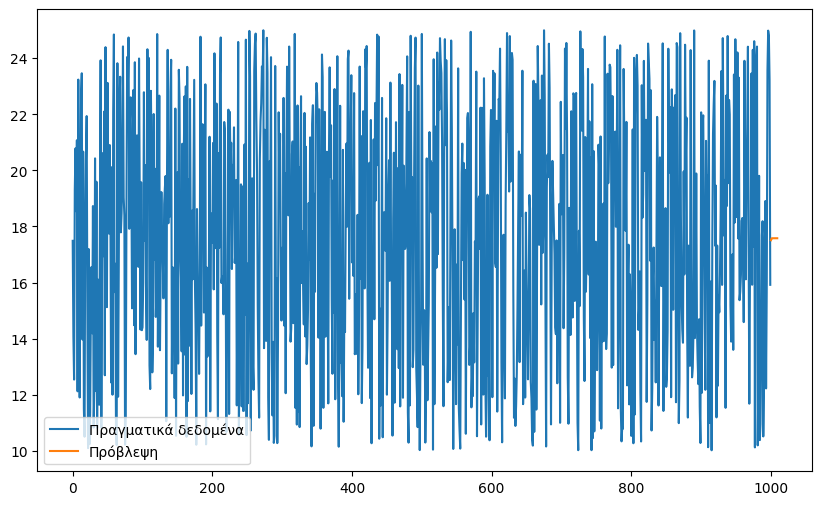

In [36]:
from statsmodels.tsa.arima.model import ARIMA

# Προετοιμασία χρονοσειράς
time_series_data = df['Beamforming Gain (dB)']  # Για παράδειγμα

# Εκπαίδευση μοντέλου ARIMA
model = ARIMA(time_series_data, order=(1, 1, 1))  # Πειραματίσου με διαφορετικές παραμέτρους
model_fit = model.fit()

# Πρόβλεψη
forecast = model_fit.forecast(steps=10)

# Οπτικοποίηση
plt.plot(time_series_data, label='Πραγματικά δεδομένα')
plt.plot(range(len(time_series_data), len(time_series_data) + 10), forecast, label='Πρόβλεψη')
plt.legend()
plt.show()


In [40]:
from sklearn.neighbors import NearestNeighbors

# Δημιουργία ενός συστήματος συστάσεων με βάση το KNN
knn = NearestNeighbors(n_neighbors=3, metric='cosine')

# Προσαρμογή του KNN στο training set
knn.fit(X_train)

# Επιλογή δείγματος από το σύνολο τεστ
idx = 10  # Μπορείς να αλλάξεις το δείγμα

# Επιστροφή κοντινών δειγμάτων με χρήση του X_test
distances, indices = knn.kneighbors(X_test.iloc[idx].values.reshape(1, -1))

# Έλεγχος αν υπάρχουν δείκτες
if indices.size > 0:
    # Εμφάνιση των κοντινών δειγμάτων με τους σωστούς δείκτες
    print("Κοντινότερα δείγματα:")
    for i in range(len(indices[0])):
        print(f"Δείγμα {i + 1} από το X_train: {X_train.iloc[indices[0][i]]}")
else:
    print("Δεν βρέθηκαν κοντινά δείγματα.")


Κοντινότερα δείγματα:
Δείγμα 1 από το X_train: Obstacle Density                        8
Mobility (m/s)                   0.625532
Frequency (GHz)                       100
Transmit Power (dBm)            15.106169
Number of Antennas                    128
Codebook Size                          32
Bandwidth (MHz)                       100
Interference Level (dB)        -93.714705
SIFT Keypoints                        146
Beamforming Gain (dB)           15.280249
Latency (ms)                     7.244608
Energy Consumption (kWh/Gb)      0.028804
Throughput (Mbps)              904.427689
Beam Training Time (s)           0.086254
SNR Improvement (dB)             7.412802
Processing Time (ms)             2.579466
Memory Usage (MB)                     182
Environment_Outdoor                 False
Device Type_IoT Sensor              False
Device Type_Smartphone              False
Name: 291, dtype: object
Δείγμα 2 από το X_train: Obstacle Density                        4
Mobility (m/s)       

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but NearestNeighbors was fitted with feature names



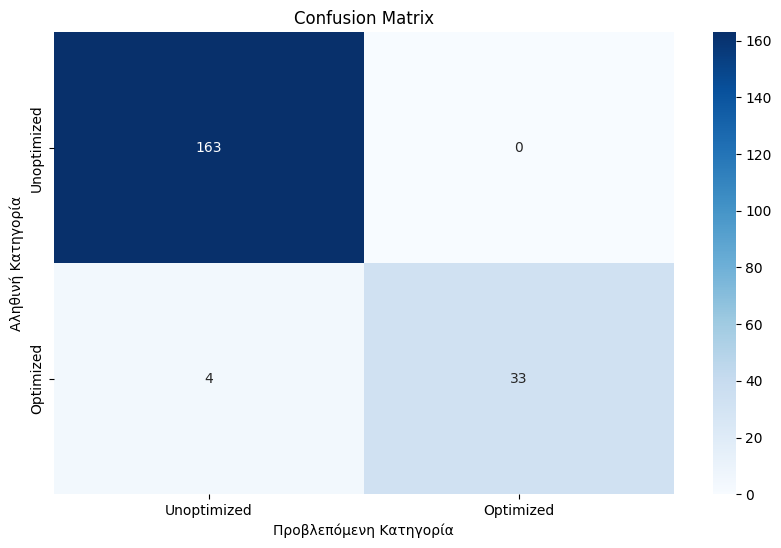

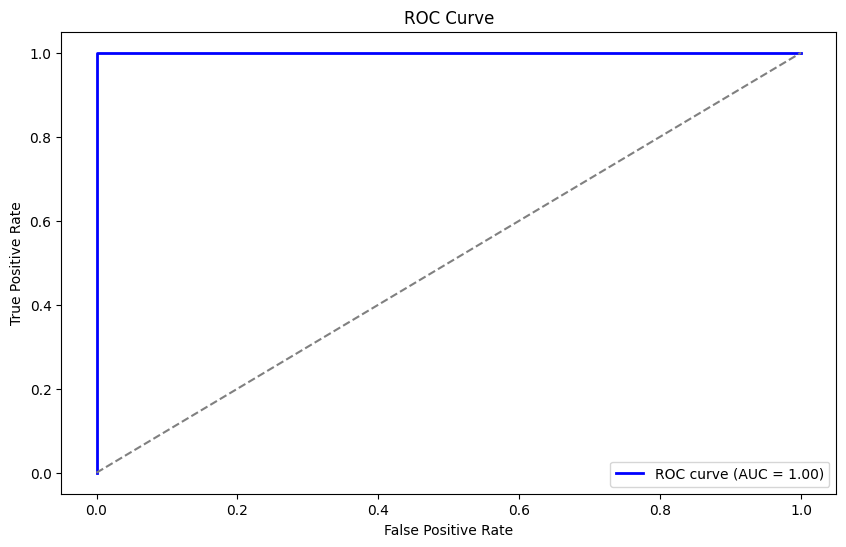

In [41]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import seaborn as sns

# Προβλέψεις από το μοντέλο
y_pred = rf_model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Οπτικοποίηση Confusion Matrix
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['Unoptimized', 'Optimized'], yticklabels=['Unoptimized', 'Optimized'])
plt.title('Confusion Matrix')
plt.xlabel('Προβλεπόμενη Κατηγορία')
plt.ylabel('Αληθινή Κατηγορία')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Οπτικοποίηση ROC Curve
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [42]:
from tpot import TPOTClassifier

# Εκπαίδευση μοντέλου με TPOT
tpot = TPOTClassifier(verbosity=2, generations=5, population_size=20)
tpot.fit(X_train, y_train)

# Προβλέψεις
tpot_predictions = tpot.predict(X_test)

# Απόδοση
from sklearn.metrics import accuracy_score
print("Ακρίβεια TPOT:", accuracy_score(y_test, tpot_predictions))


Version 0.12.1 of tpot is outdated. Version 1.0.0 was released Wednesday February 26, 2025.


Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9974999999999999

Generation 2 - Current best internal CV score: 0.9974999999999999

Generation 3 - Current best internal CV score: 0.9974999999999999

Generation 4 - Current best internal CV score: 0.9974999999999999

Generation 5 - Current best internal CV score: 0.9974999999999999

Best pipeline: DecisionTreeClassifier(input_matrix, criterion=gini, max_depth=5, min_samples_leaf=16, min_samples_split=3)
Ακρίβεια TPOT: 0.99


LIME για εξηγήσεις σε τοπικό επίπεδο.

Χρονοσειρές (ARIMA) για ανάλυση του beamforming με την πάροδο του χρόνου.

Σύστημα Συστάσεων για την εύρεση της καλύτερης ρύθμισης για το beamforming.

Confusion Matrix & ROC Curve για καλύτερη αξιολόγηση του μοντέλου.

AutoML (TPOT) για αυτόματη βελτιστοποίηση μοντέλων